# Прогнозирование оттока клиентов оператора связи "ТелеДом"

Компания «ТелеДом» стремится минимизировать отток абонентов, чтобы обеспечить стабильный рост и развитие. Для этого необходимо разработать модель, способную предсказывать вероятность расторжения договора клиентами.

**Цель проекта**: Основной целью данного проекта является создание модели машинного обучения, которая будет эффективно прогнозировать отток клиентов компании «ТелеДом».

**Задачи проекта**:

1. **Загрузка и первичный осмотр данных**, предоставленных заказчиком.
2. **Исследовательский анализ и предобработка данных**.
3. **Объединение данных из различных источников** в единый датафрейм.
4. **Исследовательский анализ объединённых данных**, включая визуализацию и корреляционный анализ.
5. **Подготовка данных для обучения модели**, включая разделение на обучающую и тестовую выборки.
6. **Обучение и настройка моделей машинного обучения**.
7. **Выбор и оценка наилучшей модели** на основе тестовых данных.
8. **Формирование рекомендаций для бизнеса** на основе полученных результатов.

**Ожидаемый результат**: Ожидается, что в результате выполнения проекта «ТелеДом» получит инструмент для прогнозирования оттока клиентов с высокой точностью. Это позволит компании своевременно принимать меры по удержанию абонентов и повышению их удовлетворённости услугами.


**Описание данных**

Заказчик предоставил следующие файлы данных:

Данные состоят из нескольких файлов, полученных из разных источников:
1. contract_new.csv — информация о договоре;
2. personal_new.csv — персональные данные клиента;
3. internet_new.csv — информация об интернет-услугах;
4. phone_new.csv — информация об услугах телефонии.


- Файл contract_new.csv
    * customerID — идентификатор абонента;
    * BeginDate — дата начала действия договора;
    * EndDate — дата окончания действия договора;
    * Type — тип оплаты: раз в год-два или ежемесячно;
    * PaperlessBilling — электронный расчётный лист;
    * PaymentMethod — тип платежа;
    * MonthlyCharges — расходы за месяц;
    * TotalCharges — общие расходы абонента.


- Файл personal_new.csv
    * customerID — идентификатор пользователя;
    * gender — пол;
    * SeniorCitizen — является ли абонент пенсионером;
    * Partner — есть ли у абонента супруг или супруга;
    * Dependents — есть ли у абонента дети.


- Файл internet_new.csv
    * customerID — идентификатор пользователя;
    * InternetService — тип подключения;
    * OnlineSecurity — блокировка опасных сайтов;
    * OnlineBackup — облачное хранилище файлов для резервного копирования данных;
    * DeviceProtection — антивирус;
    * TechSupport — выделенная линия технической поддержки;
    * StreamingTV — стриминговое телевидение;
    * StreamingMovies — каталог фильмов.


- Файл phone_new.csv
    * customerID — идентификатор пользователя;
    * MultipleLines — подключение телефона к нескольким линиям одновременно.

Эти данные позволят провести всесторонний анализ и построить модель, способную точно предсказывать вероятность оттока клиентов.


**Описание услуг**

Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
* Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
* Выделенная линия технической поддержки (TechSupport);
* Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
* Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
 
Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.


**Важная информация для выполнения проекта**:

1. Информация о договорах актуальна на 1 февраля 2020 года.
2. Необходимо обучить хотя бы две модели классификации.
3. Хотя бы для одной модели необходимо подобрать как минимум два гиперпараметра.
4. Оценка качества моделей осуществляется на основе метрики ROC-AUC.
5. Критерий оценки: ROC-AUC >= 0.85 на тестовой выборке.

Также нам заданы фиксированные величины констант
* RANDOM_STATE = 251124
* TEST_SIZE = 0.25

In [1]:
# обновим библиотеку scikit-learn
!pip install -U scikit-learn

# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import lightgbm as lgbm
from IPython.display import display

# устанавливаем и/или загружаем библиотеку phik
try:
    import phik
except:
    !pip install phik
    import phik

# загружаем функцию для построения матрицы корреляции phik
from phik.report import plot_correlation_matrix

# загружаем функцию для проверки VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем функцию для расчета roc_auc и вызова отчетов по результатам классификации
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix

# импортируем классы RandomizedSearchCV и train_test_split
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# задаем константы
RANDOM_STATE = 251124
TEST_SIZE = 0.25

     |████████████████████████████████| 13.4 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 87.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


## Загрузка данных

Выполним загрузку датасетов в рабочую область.

In [2]:
# загружаем датасеты из csv-файлов
contract_new = pd.read_csv('/datasets/contract_new.csv')
personal_new = pd.read_csv('/datasets/personal_new.csv')
internet_new = pd.read_csv('/datasets/internet_new.csv')
phone_new = pd.read_csv('/datasets/phone_new.csv')

In [4]:
# присвоим имена датасетам через цикл
# создаем списки с датафреймами и именами
dfs = [contract_new, 
       personal_new, 
       internet_new, 
       phone_new]
names = ['contract_new', 
         'personal_new', 
         'internet_new', 
         'phone_new']

# при помощи цикла присваиваем имя соответсвтующему датафрейму 
for i, df in enumerate(dfs):
    df.name = names[i]

Данные успешно загружены.

## Предобработка данных

В начале проведем разведывательный анализ датасетов. Потом перейдем к соответствующим преобразованиям при выявлении проблем с данными.

### Разведывательный анализ датасета `contract_new`

Составим функцию для разведывательного анализа данных. Она даст возможность проанализировать:
- Информацию о датасете;
- Первые пять строк датасета;
- Количество пропусков;
- Число дубликатов;
- Количество уникальных значений в столбцах;
- Первые 10 экземпляров уникальных значений.

In [5]:
# функция для разведывательного анализа датасета
def primary_analysis(df):
    # Выведем название датасета
    print('РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАТАСЕТА:', df.name)
    print('\n')
    
    # Выведем информацию о датасете
    print('Информация о датасете:')
    print(df.info())
    print('\n')
    
    # Выведем первые пять строк датасета
    print('Первые пять строк датасета:')
    print(df.head())
    print('\n')
    
    # Выведем число пропусков по каждому столбцу
    print('Количество пропущенных значений:')
    print(df.isna().sum())
    print('\n')
    
    # Посчитаем количество дубликатов в данных
    print('Количество дубликатов:')
    print(df.duplicated().sum())
    print('\n')

    # Выведем количество уникальных значений в каждом столбце, отсортированных по количеству
    print('Количество уникальных значений в столбцах, отсортированных по их числу')
    print(df.nunique().sort_values(ascending=False))
    print('\n')
    
    # Выведем уникальные значения по каждому столбцу
    print('Первые 10 уникальных значений по столбцам:')
    for column in df.nunique().sort_values(ascending=False).index:
        print(column)
        count = df[column].value_counts() # частота уникальных значений
        ratio = (count / len(df) * 100).round(2) # частость уникальных значений
        uniq_stat = (pd.DataFrame({'count': count, 
                                   'ratio': ratio})
                     .sort_values('ratio', ascending=False)
                     .head(10))
        print(uniq_stat)
        print('\n')

Для начала проведем разведывательный анализ датасета с информацией о договоре.

In [6]:
# выведем отчет с результатами первичного анализа датасета
primary_analysis(dfs[0])

РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАТАСЕТА: contract_new


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


Первые пять строк датасета:
   customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month    

Далее представим выводы по результатам разведывательного анализа первого датасета.

*ВЫВОДЫ ПО ДАТАСЕТУ:*

- В датасете с информацией по договорам содержится 7043 записи;
- Пропусков в данных нет;
- Явные дубликаты не обнаружены;
- Что касается уникальных значений признаков, то можно сделать следующие выводы:
    * В поле с идентификатором договора используется буквенно-цифровой код;
    * В столбцах `MonthlyCharges` и `TotalCharges` представлены числовые значения месячных и общих расходов абонента соотственно. В `TotalCharges` присутствуют аномальные значения в виде пробела; 
    * В полях `BeginDate` и `EndDate` содержатся строковые обозначения дат начала и конца договора. В `EndDate` есть значение 'No' для конца срока договора;
    * В датасете используются четыре различных метода оплаты;
    * В столбце `Type` представлены три типа контрактов: месячный, годовой и двухгодичный;
    * У клиента может быть, либо может отсутствовать электронный расчётный лист (кодировка "Да" и "Нет"). Это бинарная переменная, которую можно привести к целочисленному признаку с кодировкой 0 и 1.
- Названия столбцов представлены в "ВерблюжьемРегистре";
- Есть несоответствие форматов данных содержимому.


Далее перейдем к анализу датасета с персональными данными клиентов.

In [7]:
# выведем отчет с результатами первичного анализа датасета
primary_analysis(dfs[1])

РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАТАСЕТА: personal_new


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


Первые пять строк датасета:
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No


Количество пропущенных значений:
customerID       0
gender           0
SeniorCitizen    0
Partne

*ВЫВОДЫ ПО ДАТАСЕТУ:*

- В датасете с информацией о клиентах содержится 7043 записи;
- Пропусков в данных нет;
- Явные дубликаты не обнаружены;
- По уникальным значениям картина следующая:
    * У клиентов указан пол ("мужской" или "женский");
    * Есть информация о том, является ли абонент пенсионером (кодировка "0" и "1");
    * У клиента отмечено наличие партнера ("Да" или "Нет");
    * Существует информация о наличии детей ("Да" или "Нет"). 
- Названия столбцов представлены в "ВерблюжьемРегистре";
- Есть несоответствие форматов данных содержимому.

In [8]:
# выведем отчет с результатами первичного анализа датасета
primary_analysis(dfs[2])

РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАТАСЕТА: internet_new


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


Первые пять строк датасета:
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes       

*ВЫВОДЫ ПО ДАТАСЕТУ:*

- В датасете с информацией об интернет-услугах содержится 5517 записи;
- Пропусков в данных нет;
- Явные дубликаты не обнаружены;
- Признаки примечательны следующими уникальным значениям:
    * Все признаки, кроме идентификатора клиента, бинарные. Они представлены в формате строк ("Да" или "Нет"). Для удобства перед обучением модели их можно привести к целочисленному формату и закодировать "1" и "0". 
- Названия столбцов представлены в "ВерблюжьемРегистре";
- Есть несоответствие форматов данных содержимому.

In [9]:
# выведем отчет с результатами первичного анализа датасета
primary_analysis(dfs[3])

РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАТАСЕТА: phone_new


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


Первые пять строк датасета:
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


Количество пропущенных значений:
customerID       0
MultipleLines    0
dtype: int64


Количество дубликатов:
0


Количество уникальных значений в столбцах, отсортированных по их числу
customerID       6361
MultipleLines       2
dtype: int64


Первые 10 уникальных значений по столбцам:
customerID
            count  ratio
0310-VQXAM      1   0.02
3397-AVTKU      1   0.02
2957-LOLHO      1   0.02
1323-OOEPC

*ВЫВОДЫ ПО ДАТАСЕТУ:*

- В датасете с информацией об услугах телефонии содержится 6361 записи с двумя полями;
- Пропусков в данных нет;
- Дубликатов нет;
- Признак MultipleLines содержит два уникальных значения в формате строк ("Да" или "Нет"). Перед обучением модели их можно привести к целочисленному формату и закодировать "1" и "0".
- Названия столбцов представлены в "ВерблюжьемРегистре";
- Есть несоответствие форматов данных содержимому.

**ВЫВОДЫ ПО ИТОГАМ РАЗВЕДЫВАТЕЛЬНОГО АНАЛИЗА ДАТАСЕТОВ**

*ПЛАНИРУЕМЫЕ ЗАДАЧИ:*
1. Объединить таблицы на основе идентификатора клиента. Это поле установить в качестве индекса. 
2. Необходимо привести названия столбцов к "змеиному_регистру"; 
3. Нужно преобразовать форматы данных, учитывая артефакты в столбцах, а именно:
    
    | Название столбца | Информация об абоненте | Изменение формата | Артефакты |
    |:--------|:--------|:--------|:--------|
    | BeginDate | Дата начала действия договора | <font color="red">object</font> → <font color="green">datetime64</font> | - | База для расчета продолжительности пользования услугами |
    | EndDate | Дата окончания действия договора | <font color="red">object</font> → <font color="green">datetime64</font> | Значение "No" | База для расчета продолжительности пользования услугами и определения таргета | 
    | TotalCharges | Общие расходы абонента | <font color="red">object</font> → <font color="green">float64</font> | Пробел " " | Высокая. Общие расходы, вероятно, имеют тесную взаимосвязь с таргетом |
    |SeniorCitizen|Является ли абонент пенсионером|<font color="red">object</font> → <font color="green">int64</font> |Кодировка цифрами (0, 1), а не строками, как в прочих подобных столбцах |
       

       
4. Перед обучением модели необходимо устранить календарные признаки `BeginDate` и `EndDate` и на их основе сформировать два новых признака: 
    - `is_former` (бывший клиент или нет (ЦЕЛЕВОЙ ПРИЗНАК)) - тех клиентов, у которых указана дата конца договора, маркируем "1", у кого нет - "0";
    - `duration` (продолжительность действия договора, в днях) - разница между датой начала действия договора и датой окончания действия договора (для бывших клиентов), либо разница между датой начала действия договора и датой формирования датасетов. По условию, информация о договорах актуальна на 1 февраля 2020 года.





  


Далее приступим к планируемым преобразованиям.

### Объединение датасетов

Для начала проведем объединение датасетов по `customerID`. Это поле установим в качестве индекса для каждого датасета.


В двух датасетах (`contract_new` и `personal_new`) количество записей совпадает. В `internet_new` и `phone_new` записей меньше, чем в основном датасете с информацией о договорах. 

Сохраним максимально возможное количество записей из `contract_new` и присоединим к нему поля из трех других датасетов по левосторонней связи. 

In [10]:
# присваиваем индекс каждому датафрейму по столбцу customerID
for df in dfs:
    df.set_index('customerID', inplace=True)

In [11]:
# объединяем датафреймы
df_all = (dfs[0].join(dfs[1], how='left')
                .join(dfs[2], how='left')
                .join(dfs[3], how='left'))

In [12]:
# выведем информацию об объединенном датасете
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null 

**ВЫВОДЫ ПО ИТОГАМ ОБЪЕДИНЕНИЯ ДАТАСЕТОВ**

В нашем объединенном датасете содержатся поля из всех четырех таблиц.

По итогу мы получили датасет с 19 признаками длиной 7043 строки. Но в некоторые признаки (из третьего и четвертого датасетов) содержали меньшее количество строк, поэтому в нашем итоговом датасете теперь содержатся пропуски после объединения датасетов.

Продолжим намеченные преобразования.

### Приведение названий столбцов к "змеиному_регистру"

Чтобы изменить формат записи названий столбцов, будем использовать регулярные выражения для строк.

In [13]:
# объявлем функцию с регулярными выражениями для перевода названий столбцов из 'ВерблюжьегоРегистра' в 'змеиный_регистр'
def camel_to_snake(str, sep='_'): # объявляем функцию для строки с параметром по умолчанию (разделитель - нижнее подчеркивание): sep='_'
    return re.sub(r'(?<=[a-z])([A-Z])', sep + '\g<1>', str).lower() # ищем заглавные буквы, перед которой есть строчные
                                                                    # перед такими буквами вставляем нижнее подчеркивание
                                                                    # возвращаем приведенные к нижнему регистру символы в строке

In [14]:
# преобразуем названия столбцов
df_all.columns = [camel_to_snake(column) for column in df_all.columns]

In [15]:
# посмотрим на результат
df_all.columns.to_list()

['begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

In [16]:
# установим имя индекса в "змеином_регистре"
df_all.index.names = ['customer_id']

**ВЫВОД ПО ИТОГАМ ПРЕОБРАЗОВАНИЯ НАЗВАНИЙ СТОЛБЦОВ**

Данный шаг позволил нам получить измененные названия столбцов и название индекса в датафрейме. Теперь они приведены к "змеиному_регистру".

Продолжим дальше наши преобразования.

### Изменение форматов данных в столбцах `begin_date`, `end_date`, `senior_citizen` и `total_charges`

Нам необходимо изменить форматы в четырех столбцах:
- `begin_date` - дата начала действия договора;
- `end_date` - дата окончания действия договора;
- `senior_citizen` - является ли абонент пенсионером;
- `total_charges` - общие расходы абонента.

#### Столбцы с календарными признаками

Проанализируем данные в столбцах перед изменением форматов.

In [17]:
# посмотрим на даты начала договора
df_all['begin_date'].value_counts().sort_index(ascending=False).index

Index(['2020-02-01', '2020-01-01', '2019-12-01', '2019-11-01', '2019-10-01',
       '2019-09-01', '2019-08-01', '2019-07-01', '2019-06-01', '2019-05-01',
       '2019-04-01', '2019-03-01', '2019-02-01', '2019-01-01', '2018-12-01',
       '2018-11-01', '2018-10-01', '2018-09-01', '2018-08-01', '2018-07-01',
       '2018-06-01', '2018-05-01', '2018-04-01', '2018-03-01', '2018-02-01',
       '2018-01-01', '2017-12-01', '2017-11-01', '2017-10-01', '2017-09-01',
       '2017-08-01', '2017-07-01', '2017-06-01', '2017-05-01', '2017-04-01',
       '2017-03-01', '2017-02-01', '2017-01-01', '2016-12-01', '2016-11-01',
       '2016-10-01', '2016-09-01', '2016-08-01', '2016-07-01', '2016-06-01',
       '2016-05-01', '2016-04-01', '2016-03-01', '2016-02-01', '2016-01-01',
       '2015-12-01', '2015-11-01', '2015-10-01', '2015-09-01', '2015-08-01',
       '2015-07-01', '2015-06-01', '2015-05-01', '2015-04-01', '2015-03-01',
       '2015-02-01', '2015-01-01', '2014-12-01', '2014-11-01', '2014-10-01',

В столбце даты начала действия договора все значения являются дейтствительными датами, которые не противоречат условию задачи.

In [18]:
# посмотрим на даты конца договора
df_all['end_date'].value_counts().sort_index(ascending=False).index

Index(['No', '2020-01-01', '2019-12-01', '2019-11-01', '2019-10-01',
       '2019-09-01', '2019-08-01', '2019-07-01', '2019-06-01', '2019-05-01',
       '2019-04-01', '2019-03-01', '2019-02-01', '2019-01-01', '2018-12-01',
       '2018-11-01', '2018-10-01', '2018-09-01', '2018-08-01', '2018-07-01',
       '2018-06-01', '2018-05-01', '2018-04-01', '2018-03-01', '2018-02-01',
       '2018-01-01', '2017-12-01', '2017-11-01', '2017-10-01', '2017-09-01',
       '2017-08-01', '2017-07-01', '2017-06-01', '2017-05-01', '2017-04-01',
       '2017-03-01', '2017-02-01', '2017-01-01', '2016-12-01', '2016-11-01',
       '2016-10-01', '2016-09-01', '2016-08-01', '2016-07-01', '2016-06-01',
       '2016-05-01', '2016-04-01', '2016-03-01', '2016-02-01', '2016-01-01',
       '2015-12-01', '2015-11-01', '2015-10-01', '2015-09-01', '2015-08-01',
       '2015-07-01', '2015-06-01', '2015-05-01', '2015-04-01', '2015-03-01',
       '2015-02-01', '2015-01-01', '2014-12-01', '2014-11-01', '2014-10-01',
       

Все даты окончания договора раньше 1 февраля 2020 года -  актуальной даты выгрузки базы. По условию информация о договорах актуальна на 1 февраля 2020 года. Однако у 5942 клиентов стоит значени "No", то есть дата конца договора не указана, договор действует. У остальных клиентов - договор имеет дату окончания, то есть уже не действует.

Учитывая это, осуществим соответсвующие операции для изменения форматов в двух столбцах.

In [19]:
# преобразуем формат 'begin_date','end_date' (даты начала и конца действия договора)
df_all['begin_date'] = pd.to_datetime(df_all['begin_date']) # для даты начала используем стандартное преобразование
df_all['end_date'] = pd.to_datetime(df_all['end_date'], errors='coerce') # для даты конца укажем обработку нетипичных значений пропусками

In [20]:
# выведем информацию о столбцах 'begin_date','end_date'
df_all[['begin_date','end_date']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   begin_date  7043 non-null   datetime64[ns]
 1   end_date    1101 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 423.1+ KB


In [21]:
# выведем первые пять строк столбцов 'begin_date','end_date'
df_all[['begin_date','end_date']].head()

,begin_date,end_date
customer_id,,
7590-VHVEG,2020-01-01,NaT
5575-GNVDE,2017-04-01,NaT
3668-QPYBK,2019-10-01,NaT
7795-CFOCW,2016-05-01,NaT
9237-HQITU,2019-09-01,NaT


In [22]:
# выведем количество пропущенных значений по столбцам 'begin_date','end_date'
df_all[['begin_date','end_date']].isna().sum()

begin_date       0
end_date      5942
dtype: int64

Итак, мы совершили преобразования над столбцами с датами. В `end_date` на месте "No" появились пропуски. Обработаем их позднее.

#### Столбец `senior_citizen`

Перейдем к переформатированию `senior_citizen`.

В этом столбце хранятся данные, закодированные числовыми значениями. По своей природе, данный столбец не отличается от других аналогичных столбцов с информацией о клиентах, но эти столбцы закодированы строками. Соответственно, следует привести `senior_citizen` к одинаковому формату, чтобы он не отличался от других подобных категориальных переменных.  

In [23]:
df_all['senior_citizen'] = df_all['senior_citizen'].map({0:'No', 1:'Yes'})

In [24]:
df_all.head()

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.6,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.5,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No


Перейдем к переформатированию столбца `total_charges`.

#### Столбец `total_charges`

Как мы выявили ранее, в столбце `total_charges` есть неверно заполненные данные.

In [25]:
# выведем строки с пробелами в total_charges
df_all.loc[df_all['total_charges'] == ' ']

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,,Female,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN
3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,,Male,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,,Female,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,,Male,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,,Female,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN
7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,,Male,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,,Male,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,,Female,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,,Male,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


11 строк по столбцу `total_charges` заполнено пробелом " ".

Переформатируем столбец, учитывая эту особенность.

In [26]:
# преобразуем формат общих расходов абонента
df_all['total_charges'] = pd.to_numeric(df_all['total_charges'], errors='coerce')

Преобразования форматов столбцов завершены. Посмотрим на информацию о датасете.

In [27]:
# выведем информацию о датасете
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           1101 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7043 non-null   object        
 8   senior_citizen     7043 non-null   object        
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet_service   5517 non-null   object        
 12  online_security    5517 non-null   object        
 13  online_backup      5517 non-null   object        
 14

**ВЫВОД ПО ИТОГАМ ПРЕОБРАЗОВАНИЯ ФОРМАТОВ В СТОЛБЦАХ**

Мы реализовали запланированные действия и привели столбцы к нужному формату.

- `begin_date` приведен к формату datetime. Это поле пропусков не имеет.
- `end_date` также приведен к формату datetime. Валидных значений - 1101, пропущенных - 5942. Пропуски образовались на месте строки "No" для тех клиентов, у которых есть действующий договор.
- `total_charges` приведен к формату float. Теперь он подобен столбцу `monthly_charges`. В нем 11 пропущенных значений, которые возникли на месте пробелов, которые изначально были в датасете.


Таким образом, в связи с обнаруженными артефактами в некоторых столбцах, мы были вынуждены заполнить аномальные значения пропусками при изменении формата. Теперь в данных имеются пропуски в столбцах `end_date` и `total_charges`.

Далее необходимо разработать стратегию заполнения этих значений:

1. В случае с пропусками в `end_date` можно учесть эти пропуски при создании новых переменных (продолжительности договора и группировки бывшего клиента), а затем удалить признак наряду с `begin_date`;
2. В случае с `total_charges` потребуются дополнительные исследования.

В начале перейдем к формированию новых признаков на основе столбцов с датами.

### Формирование новых признаков

На этом этапе сформируем две новые переменные на основе `begin_date` и `end_date`:
- `is_former` - бывший или текущий клиент (таргет);
- `duration` - продолжительность действия договора.

После расчета новых признаков, столбцы с датами (`begin_date` и `end_date`) могут быть удалены, что решит проблему пропущенных значений в `end_date`.

#### Группировка клиентов в признаке `is_former` 

Для выполнения исследовательской задачи проекта целесообразно сформировать новую переменную `is_former` (бывший клиент или нет). Этот признак будет целевым в модели машинного обучения. Он может принимать два значения - "0" и "1".  

Тех клиентов, у которых указана дата конца договора, будем считать бывшими клиентами, которых промаркируем "1", у кого нет даты конца договора, будем рассматривать как текущих клиентов и проставим для них "0" в новой переменной.

In [28]:
# присваиваем "0" текущим клиентам, "1" - бывшим
df_all['is_former'] = df_all['end_date'].map(lambda x: 'No' if pd.isnull(x) else 'Yes')

In [29]:
# посмотрим на результат группировки
df_all['is_former'].value_counts()

No     5942
Yes    1101
Name: is_former, dtype: int64

Как мы видим, преобразования можно считать удачными. Число клиентов промаркированных как текущие (код - "0") равно количеству клиентов, у которых договор не имеет даты окончания.

#### Расчет продолжительности действия договора в признаке `duration`

Теперь сформируем признак `duration` (продолжительность действия договора, в днях). 

Этот признак будет представлять собой разницу между датой начала действия договора и датой окончания действия договора (для бывших клиентов), либо разницу между датой начала действия договора и датой формирования датасетов (для текущих клиентов). 

По условию, информация о договорах актуальна на 1 февраля 2020 года.

In [30]:
# составим функцию для одной строки, которая рассчитывает продолжительность действия договора
def calc_duration(row):
    actual_date = pd.to_datetime('2020-02-01') # дата актуальной информации о договорах (1 февраля 2020)
    begin_date = row['begin_date'] # дата начала действия договора
    end_date = row['end_date'] # дата окончания действия договора
    
    if pd.isnull(end_date): # если у клиента пропуск в дате окончания действия договора (договор действующий, клиент текуший)
        return (actual_date - begin_date).days # продолжительность в днях = actual_date - begin_date
    else: # в других случаях (если пропуска в дате окончания действия договора нет) (договор недействующий, клиент бывший)
        return (end_date - begin_date).days # продолжительность в днях = end_date - begin_date

In [31]:
# применяем функцию и рассчитываем в соответствующем столбце продолжительность действия договора
df_all['duration'] = df_all.apply(calc_duration, axis=1)

In [32]:
# выведем первые пять строк нового признака (продолжительности действия договора)
df_all['duration'].head()

customer_id
7590-VHVEG      31
5575-GNVDE    1036
3668-QPYBK     123
7795-CFOCW    1371
9237-HQITU     153
Name: duration, dtype: int64

Мы получили новый признак `duration`, который содержит данные о продолжительности действия договора в днях.

#### Удаление `begin_date` и `end_date` из датасета

На последнем шаге в этой итерации предобработки, удалим избыточные признаки дат из нашего набора данных.

In [33]:
# удаляем признаки дат
df_all = df_all.drop(['begin_date', 'end_date'], axis=1)

In [34]:
# выведем список столбцов в датасете
df_all.columns.to_list()

['type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines',
 'is_former',
 'duration']

**ВЫВОД ПО ИТОГАМ ФОРМИРОВАНИЯ НОВЫХ ПРИЗНАКОВ**

В датасете не осталось календарных признаков с датами начала и конца договора. На их основе сформированы новые столбцы - `duration` со сроком договора и `is_former` с группировкой бывший-текущий клиент (целевая переменная).

Перейдем к следующему шагу предобработки данных.

### Заполнение пропущенных значений

В этом подразделе нам предстоит разработать политику обработки пропусков в столбцах. 

In [35]:
# выведем таблицу с пропущенными значениями в объединенном датасете
df_all.isna().sum()

type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
is_former               0
duration                0
dtype: int64

На данный момент пропуски имеются в столбцах:
1. `total_charges` - общие расходы абонента. Пропуски в этом поле возникли в результате переформатирования признака (с учетом пробелов " ").
2. В столбцах, которые были добавлены в общий датасет из `internet_new` и `phone_new`.

#### Исследование и обработка пропусков в столбце `total_charges`

Рассмотрим подробнее пропуски в `total_charges`.

In [36]:
# выведем на экран срез с пропущенными значениями total_charges
df_all[['duration', 
        'monthly_charges', 
        'total_charges']].loc[df_all['total_charges'].isna()]

,duration,monthly_charges,total_charges
customer_id,,,
4472-LVYGI,0,52.55,NaN
3115-CZMZD,0,20.25,NaN
5709-LVOEQ,0,80.85,NaN
4367-NUYAO,0,25.75,NaN
1371-DWPAZ,0,56.05,NaN
7644-OMVMY,0,19.85,NaN
3213-VVOLG,0,25.35,NaN
2520-SGTTA,0,20.00,NaN
2923-ARZLG,0,19.70,NaN


Заметим такую закономерность: пропуски в `total_charges` есть только в тех строках, в которых `duration == 0`. Если продолжительность действия договора равна нулю, это значит, что удаленная переменная `begin_date == 2020-02-01`, то есть договор заключен на дату выгрузки датасета.

Предположим, что столбец `total_charges` можно заполнить значениями `monthly_charges`, то есть общие затраты клиентов могут составлять сумму оплаты услуг за месяц.

Проверим, есть ли в датасете строки, в которых значения по двум обозначенным столбцам равны. 

In [37]:
# выведем срез, где значение total_charges равно значению monthly_charges
df_all[['duration', 
        'monthly_charges', 
        'total_charges']].loc[df_all['total_charges'] == df_all['monthly_charges']].head(10)

,duration,monthly_charges,total_charges
customer_id,,,
3413-BMNZE,31,45.25,45.25
6380-ARCEH,31,20.20,20.20
3679-XASPY,31,19.45,19.45
3930-ZGWVE,31,19.75,19.75
4195-NZGTA,31,25.25,25.25
6469-MRVET,31,20.20,20.20
2080-SRCDE,31,25.40,25.40
8203-XJZRC,31,20.25,20.25
8705-WZCYL,31,44.80,44.80


Как видим, значения `total_charges` и `monthly_charges` совпадают у клиентов, которые уже пользовались услугами 31 месяц. Эти клиенты заключили договор за месяц до актуальной даты выгрузки базы (1 февраля 2020).

Поэтому присвоить столбцу `total_charges` значения `monthly_charges` в данном случае некорректно.

Для подобных пропусков в `total_charges` стоит ввести нулевое значение.

In [38]:
# заполним пропуски в total_charges нулями
df_all['total_charges'] = df_all['total_charges'].fillna(0)

In [39]:
# проверим результат
df_all.isna().sum()

type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
is_former               0
duration                0
dtype: int64

Итак, пропуски в `total_charges` устранены. Перейдем к пропускам в прочих столбцах.

#### Обработка пропусков в столбцах после объединения датасетов

Мы видим большое количество пропусков, которые возникли при объединении данных.

Зная, что поля из `internet_new` с информацией об интернет-услугах и `phone_new` с информацией об услугах телефонии относятся только к получателям соответствующих услуг, заполним пропущенные значения в них при помощи заглушки. 

Справедливо предположить, что отсутствие значений в меньших датафреймах с информацией о приобретенных услугах — это либо факт отсутствия такой услуги у клиента (то есть он её не приобретал), либо отсутствие информации о приобретении. Значит пропуски можно интерпретировать как значения "No", либо как отсутствующую информацию. 

Мы используем `No information` для таких пропусков.

In [40]:
# заполним пропуски в столбцах с информацией по видам услуг строкой "No information"
df_all = df_all.fillna('No information')

In [41]:
# выведем количество пропущенных значений после заполнения
df_all.isna().sum()

type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
is_former            0
duration             0
dtype: int64

In [42]:
# осуществим проверку наших преобразований на столбце multiple_lines
df_all['multiple_lines'].value_counts()

No                3390
Yes               2971
No information     682
Name: multiple_lines, dtype: int64

Мы заполнили все пропущенные значения в датасете.

**ВЫВОД ПО ИТОГАМ ЗАПОЛНЕНИЯ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ**

На данном шаге мы заполнили пропущенные значения в столбце `total_charges`, которые возникли после изменения формата. В этом столбце были обнаружены артефакты, которые после переформатирования стали пропусками. Были проведены дополнительные исследования на предмет того, какими данными можно было бы заменить эти пропуски. Мы пришли к выводу, что пропуски в `total_charges` есть только у тех клиентов, которые заключили договор на дату выгрузки данных. Поэтому мы заполнили пропущенные значения нулями, поскольку эти клиенты еще не могли иметь расходов за месячный период.

Также мы устранили пропущенные значения в столбцах с информацией об интернет-услугах и услугах телефонии, которые возникли после объединения датасета. У нас нет достоверной информации о том, покупали или не покупали те или иные услуги клиенты, по которым отсутствуют данные в соответствующих столбцах. Поэтому для заполнения пропусков в них мы использовали заглушку "No information".

### Общий вывод по итогам предобработки данных

На этапе предобработки данных мы:
1. Совершили разведывательный анализ датасетов перед их объединением. 
2. Объединили датасеты. Ключом выступил столбец с идентификатором - `customer_id`.
3. Осуществили запланированные по итогам разведывательного анализа преобразования данных:
    - Привели названия столбцов в "змеиный_регистр";
    - Изменили форматы столбцов `begin_date`, `end_date`, `senior_citizen`, `total_charges`;
    - На основе календарных признаков сформировали новые признаки;
        * `is_former` - признак бывшего клиента ('yes' - бывший, 'no' - текущий);
        * `duration` - продолжительность действия договора в днях.
    - Удалили календарные признаки из датасета;
    - Заполнили пропущенные значения в столбце `total_charges` и признаках с информацией об интернет-услугах и услугах телефонии.

## Исследовательский анализ данных

В рамках этого раздела мы проведём детальный анализ предоставленных данных, чтобы лучше понять их структуру и особенности. 

Для этого мы выполним следующие шаги:

1. **Анализ количественных признаков:**
    * Для количественных переменных выведем таблицу с описательной статистикой. Для визуализации распределения значений каждого количественного признака изобразим диаграммы размаха и гистограммы распределения. Это позволит нам увидеть основные тенденции и закономерности в данных.
    
    
2. **Анализ категориальных признаков:**
    * Для каждого категориального признака выведем круговую диаграмму, которая наглядно покажет пропорции между различными категориями.
    
    
3. **Корреляционный анализ:**
    * Проведём корреляционный анализ, чтобы выявить возможные взаимосвязи между признаками. Мы создадим корреляционную матрицу, для которой используем коэффициенты корреляции $\phi_K$, и оценим значения VIF (Variance Inflation Factor) для выявления мультиколлинеарности.

Данные шаги помогут нам выявить закономерности для моделирования целевого признака.

Исследовательский анализ всех признаков мы проведем как в целом по всей выборке, так и в разрезе целевой переменной (`is_former`), чтобы построить портреты бывших и текущих клиентов и определить паттерны их поведения.

### Исследовательский анализ признаков датасета

Для удобства работы с данными создадим списки признаков.

In [43]:
# сохраним в отдельной переменной список количественных признаков датасета
num_col = df_all.select_dtypes('number').columns

# сохраним в отдельной переменной список категориальных признаков датасета
cat_col = df_all.select_dtypes('object').columns

# отдельно зафиксируем список категориальных признаков из датасетов internet_new и phone_new
cat_col_services = [col for col in cat_col if 'No information' in df_all[col].unique()]

# список оставшихся категориальных признаков из датасетов contract_new и personal_new также запишем в отдельную переменную
cat_col_general = list(set(cat_col) - set(cat_col_services)) 

# для последующего анализа удалим из списка общих признаков целевую переменную 
cat_col_without_target = cat_col_general.copy()
cat_col_without_target.remove('is_former')

#### Анализ количественных признаков датасета

Начнем с описательной статистики по количественным признакам датасета.

In [44]:
# выведем таблицу с описательной статистикой количественных признаков
df_all.describe().round(2)

,monthly_charges,total_charges,duration
count,7043.00,7043.00,7043.00
mean,64.76,2115.31,898.56
std,30.09,2112.74,683.13
min,18.25,0.00,0.00
25%,35.50,436.75,276.00
50%,70.35,1343.35,761.00
75%,89.85,3236.69,1461.00
max,118.75,9221.38,2314.00


**Выводы по анализу описательной статистики по количественным признакам**

1. **Ежемесячные расходы (monthly_charges)**:
   - **Среднее значение**: В среднем клиенты тратят около 64.76 в месяц.
   - **Стандартное отклонение**: В среднем отклонение величины ежемесячных расходов составляет 30.09, что указывает на довольно широкий разброс наблюдений в выборке.
   - **Минимальное и максимальное значение**: Некоторые клиенты могут платить значительно меньше (18.25), возможно, используя узкий спектр услуг. Максимальное значение 118.75 свидетельствует о том, что некоторые клиенты могут платить значительно больше, возможно, используя более дорогие пакеты услуг.
   - **Квартили распределения**: Медиана: 70.35. Это значение близко к среднему (64.76), что указывает на симметричное распределение. Первый и третий квартили также близки к медиане и среднему, что подтверждает предположение о симметричном распределении.
   

2. **Общие расходы (total_charges)**:
   - **Среднее значение**: В среднем клиенты тратят около 2115.31 за весь период обслуживания.
   - **Стандартное отклонение**: Значение в 2112.74 указывает на значительный разброс в общих расходах между клиентами. То есть выборка неоднородна по выбору клиентами услуг и продолжительности обслуживания в компании.
   - **Минимальное и максимальное значение**: Минимальное значение импутировано нами и составляет 0. Максимум общих расходов в 4,3 раза превосходит среднее значение, что указывает на существование сегмента клиентов с очень высокими расходами на сервисы компании.
   - **Квартили распределения**: Медиана: 1343.35. Это значение значительно отличается от среднего (2115.31), что указывает на асимметричное распределение с длинным хвостом справа. Значения первого и третьего квартилей также подтверждают предположение об асимметричном распределении с большим разбросом.
   

3. **Продолжительность договора (duration)**:
   - **Среднее значение**: В среднем клиенты остаются на связи около 2,5 лет (898.56 дней).
   - **Стандартное отклонение**: Указывает на существенный разброс клиентов по продолжительности договора (около 2 лет). 
   - **Минимальное и максимальное значение**: Минимальное значение было присвоено клиентам, у которых дата начала договора совпадает с датой выгрузки базы. Некоторые клиенты остаются на связи значительно дольше - максимум составил 2314 дней.
   - **Квартили распределения**: Медиана составила 761.00. Это значение близко к среднему (898.56), что указывает на симметричное распределение. Значения квартилей также близки к медиане и среднему, что подтверждает предположение о симметричном распределении.
   
   
Эти выводы и предположения о форме распределения помогут в выборе и настройке моделей для прогнозирования оттока клиентов, учитывая особенности распределения данных.

Построим графики количественных признаков и проанализируем распределения. 

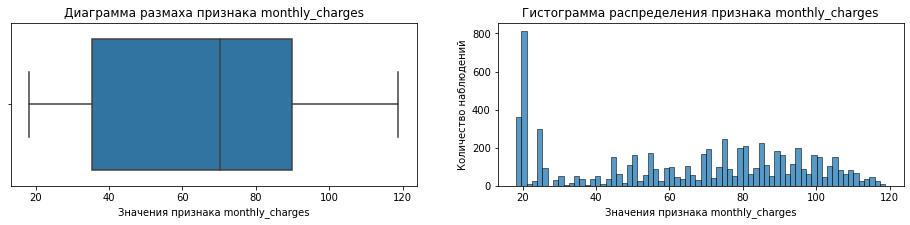

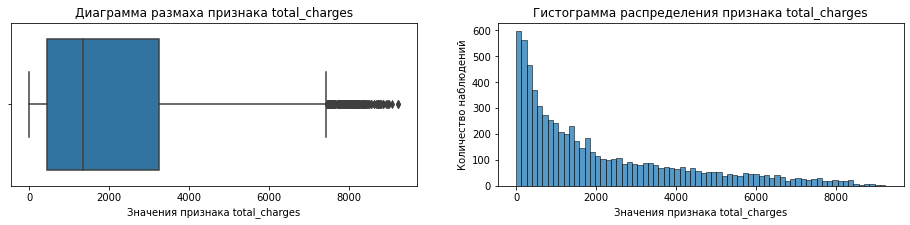

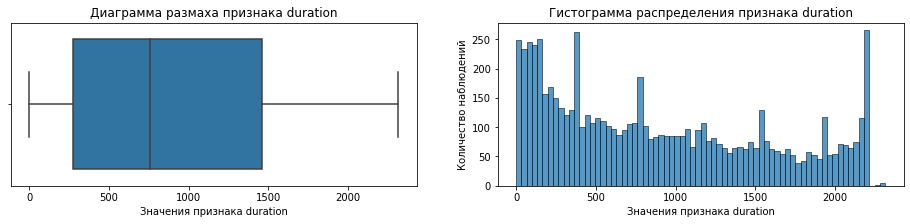

In [45]:
# выведем диаграмму размаха и гистограмму для каждого количественного признака в датасете
# при помощи цикла по количественным признакам
for col in df_all[num_col]:
    fig = plt.figure(figsize=(16, 3))  # создаем фигуру и задаем параметры графика
    ax1 = fig.add_subplot(1, 2, 1)  # добавляем axes для боксплота
    ax2 = fig.add_subplot(1, 2, 2)  # добавляем axes для гистограммы

    sns.boxplot(data=df_all, x=col, ax=ax1) # рисуем боксплот
    sns.histplot(df_all[col], ax=ax2, bins=70) # рисуем гистограмму
    
    # устанавливаем заголовок для боксплота
    ax1.set_title(f'Диаграмма размаха признака {col}')  

    # задаём названия осей для боксплота:
    ax1.set_xlabel(f'Значения признака {col}')
    
    # устанавливаем заголовок для гистограммы
    ax2.set_title(f'Гистограмма распределения признака {col}')  

    # задаём названия осей для гистограммы:
    ax2.set_xlabel(f'Значения признака {col}')
    ax2.set_ylabel('Количество наблюдений')
plt.show()

**Выводы по графическому анализу распределений количественных признаков** 

1. **Ежемесячные расходы (monthly_charges)**: Наше предположение о форме распределения ежемесячных расходов неверно. Распределение ежемесячных расходов имеет пик на минимальных значениях, снижаясь к 30, снова возрастает и выходит на пик - около 70, то есть близко к медиане. Большое количество минимальных значений указывает на наличие доли клиентов, которые платят значительно меньше остальных, возможно, используя специальные предложения или бюджетные тарифы. 


2. **Общие расходы (total_charges)**: Мы предполагали, что распределение общих расходов, вероятно, асимметрично с длинным хвостом справа. Такая форма распределения указывает на наличие значительного числа клиентов с низкими расходами. Значительный разброс в общих расходах указывает на разнообразие тарифов и услуг, предлагаемых клиентам. Действительно, клиентов с расходами выше 6000 очень мало. 


3. **Продолжительность договора (duration)**: Распределение продолжительности договора также далеко от нормального и симметричного по форме. Мы наблюдаем пики на соответствующих значениях дат, которые появились в силу специфики расчета показателя продолжительности в днях на основе помесячной статистики клиентов.

Эти выводы подчеркивают разнообразие клиентских профилей и тарифов, предлагаемых компанией, а также необходимость учета специфики расчета показателей при анализе данных.

#### Анализ категориальных признаков датасета

Продолжим исследование анализом описательной статистики по категориальным признакам.

In [46]:
# выведем таблицу с описательной статистикой категориальных признаков
df_all.describe(include='object').round().T

,count,unique,top,freq
type,7043,3,Month-to-month,3875
paperless_billing,7043,2,Yes,4171
payment_method,7043,4,Electronic check,2365
gender,7043,2,Male,3555
senior_citizen,7043,2,No,5901
partner,7043,2,No,3641
dependents,7043,2,No,4933
internet_service,7043,3,Fiber optic,3096
online_security,7043,3,No,3498
online_backup,7043,3,No,3088


**Выводы по анализу описательной статистики по количественным признакам**

*Общие признаки*
- **Тип оплаты: раз в год-два или ежемесячно (type)**: Наиболее распространенный тип оплаты — ежемесячный.
- **Электронный расчётный лист (paperless_billing)**: Большинство клиентов используют электронный расчетный лист.
- **Тип платежа (payment_method)**: Наиболее часто используемый метод оплаты — электронный чек.
- **Пол (gender)**: Большинство клиентов — мужчины.
- **Является ли абонент пенсионером (senior_citizen)**: Большинство клиентов не являются пенсионерами.
- **Есть ли у абонента супруг или супруга (partner)**: Большинство клиентов не имеют супруга или супругу.
- **Есть ли у абонента дети (dependents)**: Большинство клиентов не имеют детей.
- **Является ли абонент бывшим клиентом (is_former)**: Большинство клиентов на данный момент являются текущими абонентами. 

*Признаки с информацией по услугам* 
- **Тип подключения (internet_service)**: Наиболее часто используемый тип подключения — оптоволоконный интернет.
- **Блокировка опасных сайтов (online_security)**: Большинство клиентов не используют блокировку опасных сайтов.
- **Облачное хранилище файлов для резервного копирования данных (online_backup)**: Большинство клиентов не используют облачное хранилище для резервного копирования данных.
- **Антивирус (device_protection)**: Большинство клиентов не используют антивирус.
- **Выделенная линия технической поддержки (tech_support)**: Большинство клиентов не используют выделенную линию технической поддержки.
- **Стриминговое телевидение (streaming_tv)**: Большинство клиентов не используют стриминговое телевидение.
- **Каталог фильмов (streaming_movies)**: Большинство клиентов не используют каталог фильмов.
- **Подключение телефона к нескольким линиям одновременно (multiple_lines)**: Большинство клиентов не используют несколько линий одновременно. 

Эти выводы помогут лучше понять состав клиентов в выборке и их модели поведения.

Перейдем к визуализации распределений категориальных признаков.

Построим круговые диаграммы для категориальных признаков с общей информацией о клиентах и для категориальных признаков с информацией об используемых сервисах. Для последней группы признаков исключим категориюю "No information", то есть будем учитывать только имеющуюся у нас достоверную информацию.

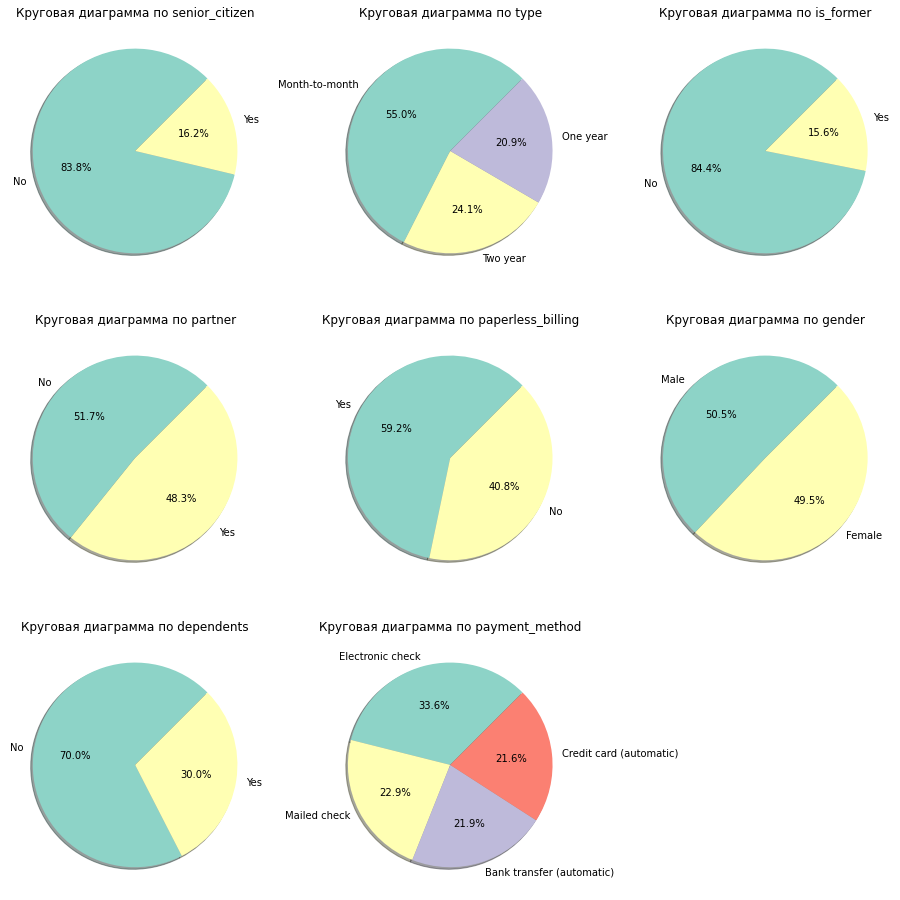

In [47]:
# построим круговую диаграмму
fig = plt.figure(figsize=(16, 16))  # создаем фигуру и задаем параметры графика

# рассчитываем количество строк и столбцов
columns = 3 # задаем желаемое число столбцов
div_grid = divmod(len(cat_col_general), columns) # деление количества категориальных признаков на количество столбцов
if div_grid[1] == 0: # если число графиков делится на число столбцов нацело
    rows = div_grid[0] # то число строк равно результату целочисленного деления
else:
    if div_grid[1] >= columns // 2: # проверяем остаток от деления
        rows = div_grid[0] + 1 # увеличиваем число строк на 1, если остаток больше или равен половине числа столбцов
    else:
        rows = div_grid[0]  # иначе оставляем результат деления без изменений

# запускаем цикл для каждого признака    
for i, col in enumerate(cat_col_general):  # перебираем столбцы
    ax = fig.add_subplot(rows, columns, i+1)  # добавляем axes
        
    # рисуем круговую диаграмму
    df_all[col].value_counts().plot.pie(
        legend=False,  # отключаем легенду
        autopct='%1.1f%%',  # указываем формат подписей
        shadow=True,  # включаем тень для диаграммы
        startangle=45,  # устанавливаем начальный угол
        ylabel='',  # убираем метку оси Y
        colors=sns.color_palette('Set3'))  # используем цветовую палитру Set3
    
    plt.title(f'Круговая диаграмма по {col}')  # подписываем каждый график названием соответствующего признака
plt.show()

**Выводы по анализу распределения категориальных признаков с общей информацией по клиентам**

1. **Электронный расчётный лист (paperless_billing)**: Большинство клиентов (59.22%) предпочитают использовать электронный расчетный лист, что свидетельствует о предпочтении абонентами современных и удобных способов оплаты.


2. **Пол (gender)**: Распределение по полу почти равное: 50.48% мужчин и 49.52% женщин. Это указывает на то, что оба пола пользуются услугами связи примерно одинаково.


3. **Тип платежа (payment_method)**: Наиболее часто используемый метод оплаты — электронный чек (33.58%). Это может быть связано с удобством и безопасностью данного метода. Значительное количество клиентов также используют банковские переводы (21.92%) и кредитные карты (21.61%), что говорит о разнообразии предпочтений.


4. **Есть ли у абонента супруг или супруга (partner)**: Большинство клиентов (51.69%) не имеют супруга или супругу.


5. **Есть ли у абонента дети (dependents)**: Большинство клиентов (70.04%) не имеют детей.


6. **Является ли абонент пенсионером (senior_citizen)**: Подавляющее большинство клиентов (83.79%) не являются пенсионерами. Это может указывать на то, что пенсионеры реже обращаются за услугами связи к провайдеру.


7. **Тип оплаты: раз в год-два или ежемесячно (type)**:  Наиболее распространенный тип оплаты — ежемесячный (55.02%). Это указывает на то, что большинство клиентов предпочитают более гибкие и частые платежи. Значительное количество клиентов также выбирают двухлетние (24.07%) и годовые (20.91%) контракты, что свидетельствует о разнообразии предпочтений по длительности договоров.


8. **Является ли абонент бывшим клиентом (is_former) ЦЕЛЕВОЙ ПРИЗНАК**: В датасете существует существенный дисбаланс классов клиентов. Большинство абонентов (84.37%) на данный момент являются текущими клиентами. 15.63% абонентов являются бывшими клиентами, что указывает на наличие оттока клиентов. Это может быть связано с различными факторами, такими как неудовлетворенность услугами, изменение потребностей или переход к конкурентам.

Эти выводы помогут составить верное представление о причинах оттока клиентов.

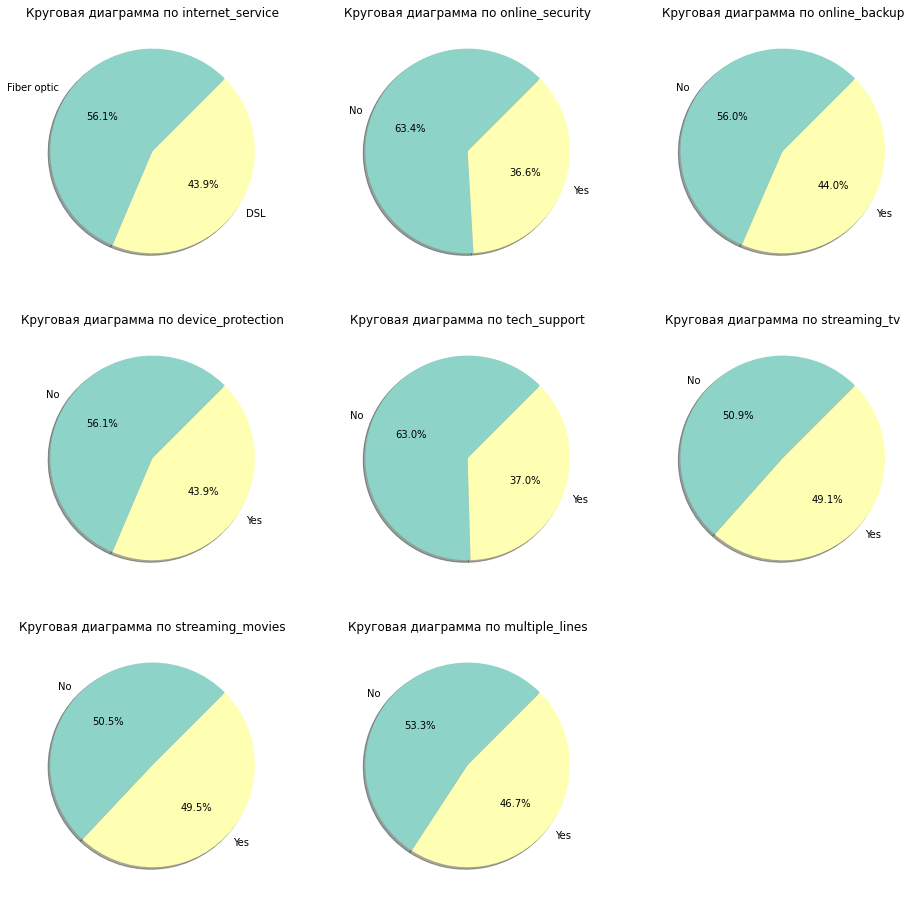

In [48]:
# построим круговую диаграмму
fig = plt.figure(figsize=(16, 16))  # создаем фигуру и задаем параметры графика

# рассчитываем количество строк и столбцов
columns = 3 # задаем желаемое число столбцов
div_grid = divmod(len(cat_col_services), columns) # деление количества категориальных признаков на количество столбцов
if div_grid[1] == 0: # если число графиков делится на число столбцов нацело
    rows = div_grid[0] # то число строк равно результату целочисленного деления
else:
    if div_grid[1] >= columns // 2: # проверяем остаток от деления
        rows = div_grid[0] + 1 # увеличиваем число строк на 1, если остаток больше или равен половине числа столбцов
    else:
        rows = div_grid[0]  # иначе оставляем результат деления без изменений

# запускаем цикл для каждого признака    
for i, col in enumerate(cat_col_services):  # перебираем столбцы
    ax = fig.add_subplot(rows, columns, i+1)  # добавляем axes
        
    # рисуем круговую диаграмму
    df_all.loc[df_all[col] != 'No information'][col].value_counts().plot.pie(
        legend=False,  # отключаем легенду
        autopct='%1.1f%%',  # указываем формат подписей
        shadow=True,  # включаем тень для диаграммы
        startangle=45,  # устанавливаем начальный угол
        ylabel='',  # убираем метку оси Y
        colors=sns.color_palette('Set3'))  # используем цветовую палитру Set3
    
    plt.title(f'Круговая диаграмма по {col}')  # подписываем каждый график названием соответствующего признака
plt.show()

**Выводы по анализу распределения категориальных признаков с информацией по услугам абонентов**

1. **Тип подключения (internet_service)**: Большинство клиентов (56.12%) используют оптоволоконное подключение, что указывает на предпочтение современных и высокоскоростных технологий. Значительное количество клиентов (43.88%) также используют DSL, что может быть связано с доступностью и экономичностью этого типа подключения.


2. **Блокировка опасных сайтов (online_security)**: Большинство клиентов (63.40%) не используют блокировку опасных сайтов, что может свидетельствовать о доверии к собственным мерам безопасности или о незнании необходимости такой защиты. Однако, 36.59% клиентов используют блокировку опасных сайтов.


3. **Облачное хранилище файлов для резервного копирования данных (online_backup)**: Большинство клиентов, по которым имеется такая информация, (55.97%) не используют облачное хранилище для резервного копирования данных. Это может быть связано с тем, что многие клиенты не видят необходимости в таком сервисе или предпочитают другие методы хранения данных. Тем не менее, 44.03% клиентов используют онлайн-хранилища.


4. **Антивирус (device_protection)**: Большинство клиентов (56.09%) не используют антивирусное программное обеспечение на своих устройствах. Это может быть связано с уверенностью в других мерах безопасности или с незнанием важности антивирусной защиты. При этом 43.90% клиентов используют антивирус.


5. **Выделенная линия технической поддержки (tech_support)**: Большинство клиентов (62.95%) не имеют выделенной линии технической поддержки. Это может указывать на то, что они предпочитают решать свои проблемы самостоятельно или использовать общие линии поддержки. 37.05% клиентов имеют выделенную линию поддержки.


6. **Стриминговое телевидение (streaming_tv)**: Почти равное количество клиентов (50.93% и 49.07%) используют и не используют стриминговое телевидение.


7. **Каталог фильмов (streaming_movies)**: Почти равное количество клиентов (50.48% и 49.52%) используют и не используют каталоги фильмов.


8. **Подключение телефона к нескольким линиям одновременно (multiple_lines)**: Большинство клиентов (53.29%) не используют подключение телефона к нескольким линиям одновременно. В основном клиенты предпочитают использовать одну линию для всех своих нужд. 46.71% клиентов используют несколько линий, что указывает на наличие спроса на эту услугу среди достаточно большой группы пользователей.

Эти выводы помогают лучше понять предпочтения и потребности клиентов, а также выявить области, в которых можно улучшить услуги и предложения.

#### Вывод по результатам исследования признаков датасета

Подведем промежуточный итог и сделаем выводы о результатах исследования признаков абонентов компании. 

**ПОРТРЕТ ТИПИЧНОГО КЛИЕНТА ПО РЕЗУЛЬТАМ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА**

Типичный клиент компании "ТелеДом" выглядит следующим образом:

1. **Пол**: Мужчина (50.48%).
2. **Возраст**: Средний возраст клиента составляет около 25-45 лет.
3. **Семейное положение**: Не состоит в браке (51.69%).
4. **Дети**: Не имеет детей (70.04%).
5. **Социальный статус**: Не пенсионер (83.79%).
6. **Тип оплаты**: Предпочитает ежемесячные платежи (55.02%).
7. **Метод оплаты**: Использует электронный чек (33.58%).
8. **Продолжительность договора**: Пользуется услугами компании около 2,5 лет (898.56 дней).
9. **Ежемесячные расходы**: В среднем тратит около 64.76 в месяц.
10. **Общие расходы**: В среднем тратит около 2115.31 за весь период обслуживания.

Этот типичный клиент предпочитает современные и удобные способы оплаты, такие как электронный расчетный лист и электронные чеки. Он не имеет супруга (супруги) или детей, что указывает на его мобильность и гибкость в выборе услуг. Он также не является пенсионером, что свидетельствует о его высокий экономической активности и потребности в современных услугах связи.

Таким образом, типичный клиент компании — это мужчина среднего возраста, неженатый, без детей, активный пользователь услуг связи, предпочитающий ежемесячные платежи и современные методы оплаты.

Типичные клиенты предпочитают современные и высокоскоростные технологии, такие как оптоволоконное подключение (56.12%). Большинство клиентов не используют блокировку опасных сайтов (63.40%) и облачное хранилище для резервного копирования данных (55.97%). Антивирусное программное обеспечение используют 43.90% клиентов. Выделенная линия технической поддержки есть у 37.05% клиентов. Почти равное количество клиентов используют и не используют стриминговое телевидение и каталоги фильмов. Подключение телефона к нескольким линиям одновременно используют только 46.71% клиентов.

Далее перейдем к исследовательскому анализу признаков датасета в разрезе бывших и текущих клиентов компании.

### Исследовательский анализ признаков по бывшим и текущим клиентам

Приступим к исследовательскому анализу признаков в разрезе двух групп абонентов - бывших клиентов и текущих клиентов компании.

#### Анализ количественных признаков по группам клиентов

Начнем с описательной статистики по количественным признакам.

In [49]:
# вспомогательная функция для условного форматирования ячеек по итогам сравнительного анализа двух категорий
def highlight_value_in_row(row):
    max_in_row = row.max()
    highlight_max = 'background-color: #cae9be;'
 
    min_in_row = row.min()
    highlight_min = 'background-color: #ff9b9b;'
 
    equal_values = row.eq(row.max())
    highlight_equal = 'background-color: #fff8c3;'
 
    return [
        highlight_equal if max_in_row == min_in_row else (
        highlight_min if v == min_in_row else (
        highlight_max if v == max_in_row else ''))
        for v in row
        ]

Выведем таблицы с описательной статистикой, к которым для удобства сравнительного анализа по подгруппам клиентов, применим условное форматирование ячеек. 

In [50]:
# строим таблицы с описательной статистикой в разрезе таргета
print('Описательная статистика по группам клиентов (бывшие и текущие) по количественным признакам')
for col in num_col: 
    print(col)
    describe_table = df_all.groupby('is_former')[col].describe()
    styled_table = describe_table.style.apply(highlight_value_in_row, axis=0)
    display(styled_table.set_precision(2))
    print('\n')

Описательная статистика по группам клиентов (бывшие и текущие) по количественным признакам
monthly_charges


,count,mean,std,min,25%,50%,75%,max
is_former,,,,,,,,
No,5942.00,62.76,29.84,18.25,30.06,69.20,87.24,118.60
Yes,1101.00,75.55,29.12,18.40,56.15,84.20,99.50,118.75




total_charges


,count,mean,std,min,25%,50%,75%,max
is_former,,,,,,,,
No,5942.00,2067.87,2193.90,0.00,374.35,1192.80,3173.84,9221.38
Yes,1101.00,2371.38,1581.86,77.84,1048.05,2139.03,3404.91,7649.76




duration


,count,mean,std,min,25%,50%,75%,max
is_former,,,,,,,,
No,5942.00,893.68,716.96,0.00,245.00,702.00,1523.00,2314.00
Yes,1101.00,924.86,458.77,28.00,577.00,915.00,1249.00,2129.00


**Выводы по анализу описательной статистики по количественным признакам (в разрезе таргета)**

1. **Ежемесячные расходы (monthly_charges)**:
   - Бывшие клиенты имеют более высокие средние ежемесячные расходы (75.55), что может свидетельствовать о том, что они использовали более дорогие тарифы (подключали больше сервисов).
   - Стандартное отклонение у бывших клиентов выше (29.12), что указывает на более широкий разброс значений.
   - Распределение ежемесячных расходов у бывших клиентов может быть более узким, что подтверждается более высокими значениями медианы и квартилей.


2. **Общие расходы (total_charges)**:
   - Бывшие клиенты имеют более высокие общие расходы (2371.38) по сравнению с текущими клиентами (2067.87), что также может указывать на использование ими более дорогих тарифов в течение срока договора.
   - Стандартное отклонение у бывших клиентов также выше (1581.86), что говорит о большем разбросе значений.
   - Распределение общих расходов у бывших клиентов может быть более узким, что подтверждается значениями квартилей.
   

3. **Продолжительность договора (duration)**:
   - Текущие клиенты имеют более низкую среднюю продолжительность договора (893.68) по сравнению с бывшими (924.86).
   - Стандартное отклонение у бывших клиентов выше (458.77), что указывает на более широкий разброс значений.
   - Распределение продолжительности договора у бывших клиентов может быть более узким.

Эти выводы подчеркивают важность удержания текущих клиентов и анализа причин оттока для улучшения качества обслуживания и удержания клиентов.

Далее построим графики распределений количественных признаков по бывшим и текущим клиентам.

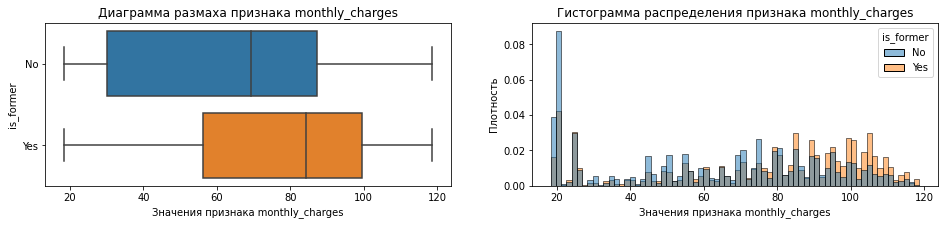

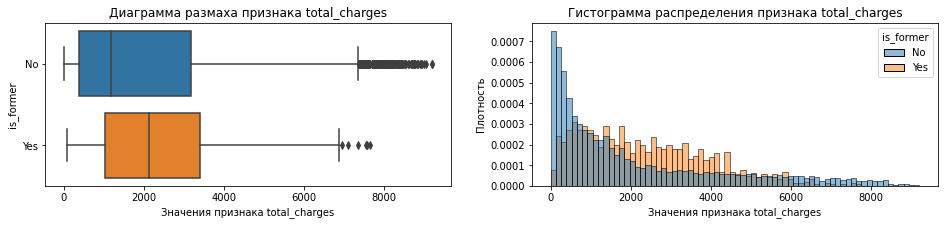

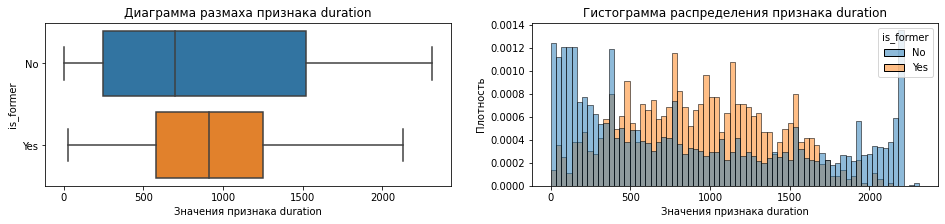

In [51]:
# при помощи цикла по количественным признакам
for col in num_col:
    fig = plt.figure(figsize=(16, 3))  # создаем фигуру и задаем параметры графика
    ax1 = fig.add_subplot(1, 2, 1)  # добавляем axes для боксплота
    ax2 = fig.add_subplot(1, 2, 2)  # добавляем axes для гистограммы

    sns.boxplot(data=df_all, x=col, y='is_former', ax=ax1) # рисуем боксплот
    sns.histplot(data=df_all, x=col, hue='is_former', ax=ax2, common_norm=False, stat='density', bins=70) # рисуем гистограмму с нормализацией
    
    # устанавливаем заголовок для боксплота
    ax1.set_title(f'Диаграмма размаха признака {col}')

    # задаём названия осей для боксплота
    ax1.set_xlabel(f'Значения признака {col}')
    
    # устанавливаем заголовок для гистограммы
    ax2.set_title(f'Гистограмма распределения признака {col}')  

    # задаём названия осей для гистограммы:
    ax2.set_xlabel(f'Значения признака {col}')
    ax2.set_ylabel('Плотность')

plt.show()

**Выводы по графическому анализу распределений количественных признаков по группам клиентов** 

1. **Ежемесячные расходы (monthly_charges)**:
   - У текущих клиентов распределение ежемесячных расходов более сконцентрировано вокруг нижних квартилей, что указывает на их склонность к более экономным тарифам.
   - У бывших клиентов распределение ежемесячных расходов является более узким и смещенным к верхним квартилям, что свидетельствует об использовании ими более дорогих тарифов.


2. **Общие расходы (total_charges)**:
   - У текущих клиентов распределение общих расходов также более сконцентрировано вокруг нижних квартилей, что свидетельствует об их склонности к более экономным тарифам (меньшего числа услуг).
   - У бывших клиентов распределение общих расходов является более узким и смещенным вправо, что указывает на их использование более дорогих тарифов (большего числа услуг).
   

3. **Продолжительность договора (duration)**:
   - У текущих клиентов распределение продолжительности договора более сконцентрировано вокруг нижних квартилей и верхних квартилей, что указывает на присутствие большой группы абонентов, недавно заключивших договор, и постоянных клиентов.
   - У бывших клиентов распределение продолжительности договора  более узкое и смещено вправо, что свидетельствует об их долгом обслуживании в компании (в среднем около 3 лет).

Далее перейдем к анализу категориальных признаков в разрезе целевого признака.

#### Анализ категориальных признаков по группа клиентов

Далее построим таблицы с описательной статистикой по категориальным признакам в разрезе целевой переменной.

In [52]:
# строим таблицы с описательной статистикой в разрезе таргета
print('Описательная статистика по группам клиентов (бывшие и текущие) по категориальным признакам (общие сведения о клиентах)')
# в цикле перебираем признаки
for col in cat_col_without_target: 
    print(col) # печатаем название признака
    describe_table = df_all.groupby('is_former')[col].describe(include='object').T # группируем и выводим статистику по значениям
    styled_table = describe_table.style.apply(highlight_value_in_row, axis=1) # применяем форматирование
    display(styled_table.set_precision(2)) # выводим таблицу
    print('\n') # добавляем пустую строку

Описательная статистика по группам клиентов (бывшие и текущие) по категориальным признакам (общие сведения о клиентах)
senior_citizen


is_former,No,Yes
count,5942,1101
unique,2,2
top,No,No
freq,5032,869




type


is_former,No,Yes
count,5942,1101
unique,3,3
top,Month-to-month,Month-to-month
freq,3468,407




partner


is_former,No,Yes
count,5942,1101
unique,2,2
top,No,Yes
freq,3259,719




paperless_billing


is_former,No,Yes
count,5942,1101
unique,2,2
top,Yes,Yes
freq,3450,721




gender


is_former,No,Yes
count,5942,1101
unique,2,2
top,Male,Male
freq,2982,573




dependents


is_former,No,Yes
count,5942,1101
unique,2,2
top,No,No
freq,4200,733




payment_method


is_former,No,Yes
count,5942,1101
unique,4,4
top,Electronic check,Electronic check
freq,2015,350


По таблицам видим, что у бывших и у текущих клиентов совпадают все типичные общие характеристики, кроме признака `partner`. Для бывших абонентов характерно наличие партнера, для текущих типично его отсутствие.  

In [53]:
# строим таблицы с описательной статистикой в разрезе таргета
print('Описательная статистика по группам клиентов (бывшие и текущие) по категориальным признакам (сведения об услугах)')
# в цикле перебираем признаки
for col in cat_col_services: 
    print(col) # печатаем название признака
    describe_table = df_all.groupby('is_former')[col].describe(include='object').T # группируем и выводим статистику по значениям
    styled_table = describe_table.style.apply(highlight_value_in_row, axis=1) # применяем форматирование
    display(styled_table.set_precision(2)) # выводим таблицу
    print('\n') # добавляем пустую строку

Описательная статистика по группам клиентов (бывшие и текущие) по категориальным признакам (сведения об услугах)
internet_service


is_former,No,Yes
count,5942,1101
unique,3,3
top,Fiber optic,Fiber optic
freq,2501,595




online_security


is_former,No,Yes
count,5942,1101
unique,3,3
top,No,No
freq,2972,526




online_backup


is_former,No,Yes
count,5942,1101
unique,3,3
top,No,Yes
freq,2707,560




device_protection


is_former,No,Yes
count,5942,1101
unique,3,3
top,No,Yes
freq,2704,550




tech_support


is_former,No,Yes
count,5942,1101
unique,3,3
top,No,No
freq,2930,543




streaming_tv


is_former,No,Yes
count,5942,1101
unique,3,3
top,No,Yes
freq,2453,584




streaming_movies


is_former,No,Yes
count,5942,1101
unique,3,3
top,No,Yes
freq,2450,606




multiple_lines


is_former,No,Yes
count,5942,1101
unique,3,3
top,No,Yes
freq,3070,678


В отличии от текущих клиентов для бывших абонентов являлось распространенным явлением использование целого ряда услуг компании. Об этом мы можем судить по следующим данных: 
- online_backup (текущие - не использовали, бывшие - использовали) 
- device_protection, (текущие - не использовали, бывшие - использовали) 
- streaming_tv, (текущие - не использовали, бывшие - использовали) 
- streaming_movies, (текущие - не использовали, бывшие - использовали) 
- multiple_lines(текущие - не использовали, бывшие - использовали)

Эти данные говорят о том, что типичный бывший клиент в основном использовал перечисленные услуги, а среднестатистический текущий клиент в основном ими не пользуется.

Рассмотрим более подробно отличия распределения категорий у бывших и текущих клиентов.

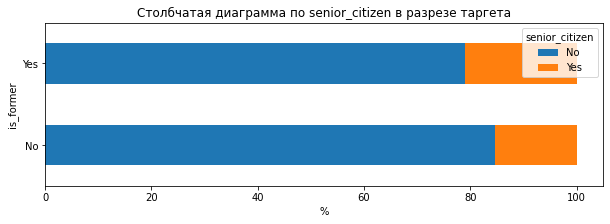

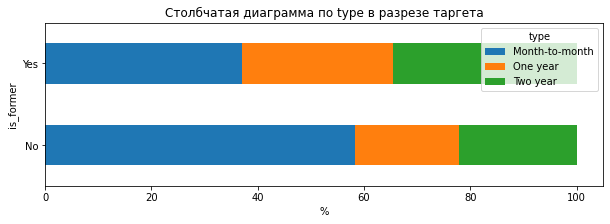

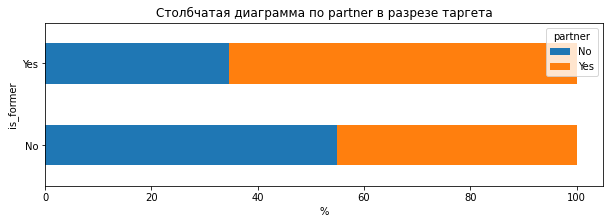

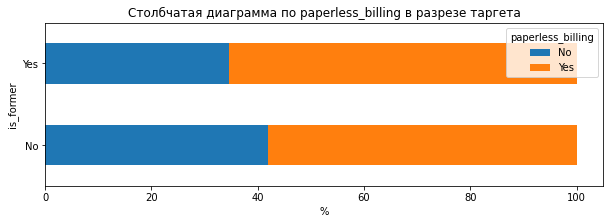

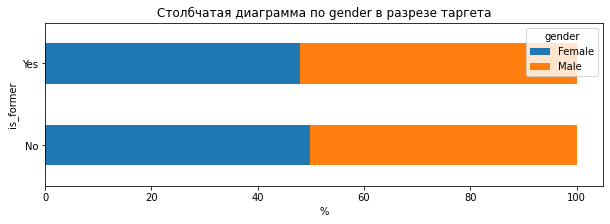

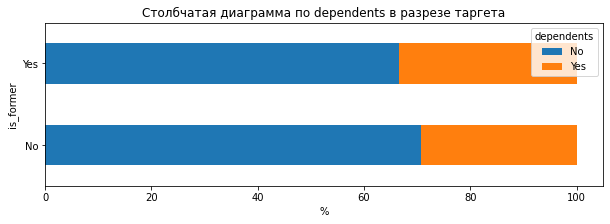

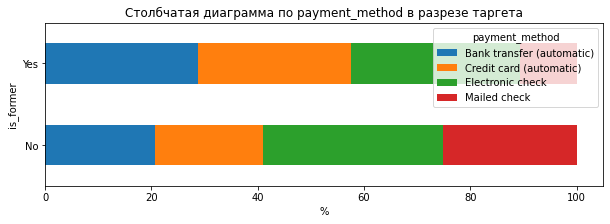

In [54]:
# построим столбчатую диаграмму
for col in cat_col_without_target:  # в цикле перебираем столбцы

    df_tab = df_all # запоминаем датасет
    rows_tab = df_tab['is_former'].nunique() # количество строк для таблицы
    columns_tab = df_tab[col].nunique() # количество столбцов для таблицы
    
    # строим сводную таблицу
    table = pd.pivot_table(data=df_tab, 
                   index='is_former', 
                   values='total_charges', 
                   columns=col, 
                   aggfunc=len, 
                   margins=True)
    table = table.div(table.iloc[:,-1], axis=0).mul(100) # рассчитываем доли
    table = table.iloc[:rows_tab,:columns_tab] # удаляем ненужные ячейки

    # рисуем горизонтальную столбчатую диаграмму
    table.plot.barh(
        figsize=(10, 3), 
        stacked=True,
        edgecolor='none')

    plt.xlabel('%') # подписываем ось X
    plt.title(f'Столбчатая диаграмма по {col} в разрезе таргета')  # подписываем каждый график названием соответствующего признака

plt.show()

**Выводы по анализу распределения категориальных признаков с общей информацией абонентов в разрезе групп клиентов**

1. **Электронный расчётный лист (paperless_billing)**: Текущие клиенты чаще используют электронный расчет (58.06%), в то время как бывшие клиенты чаще выбирают традиционные методы (65.49 %).


2. **Пол (gender)**: Среди бывших клиентов чуть больше мужчин (52.04), в то время как среди текущих клиентов гендерное распределение примерно равное (49.81 % женщин и 50.19 % мужчин).


3. **Тип платежа (payment_method)**: Среди бывших клиентов больше тех, кто использует кредитные карты (28.79 %), в то время как среди текущих клиентов больше тех, кто предпочитает банковские переводы (20.65 %).


4. **Есть ли у абонента супруг или супруга (partner)**: Среди текущих клиентов больше тех, кто не имеет партнера (54.85 %), в то время как среди бывших клиентов больше тех, кто имеет партнера (65.30 %).


5. **Есть ли у абонента дети (dependents)**: Среди текущих клиентов больше тех, у кого нет детей (70.68 %), в то время как среди бывших клиентов больше тех, у кого есть дети (33.42 %).


6. **Является ли абонент пенсионером (senior_citizen)**: Среди текущих клиентов больше тех, кто не является пенсионером (84.69 %), в то время как среди бывших клиентов больше пенсионеров (21.07 %).


7. **Тип оплаты: раз в год-два или ежемесячно (type)**: Среди текущих клиентов больше тех, кто выбирает месячные тарифы (58.36 %), в то время как среди бывших клиентов больше тех, кто выбирает двухлетние тарифы (34.60 %).

Эти выводы могут помочь лучше понять различия между текущими и бывшими клиентами, что может быть полезно для разработки более точных моделей прогнозирования оттока клиентов.

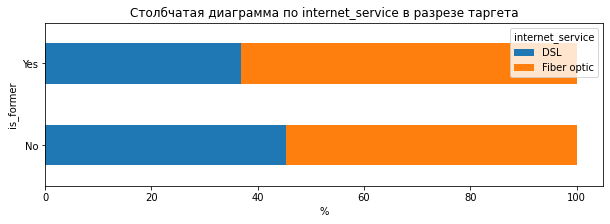

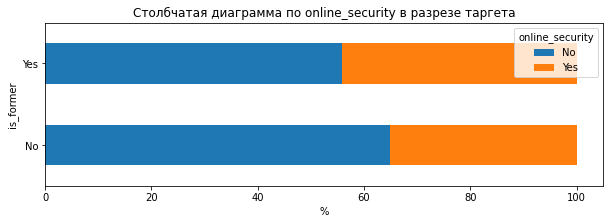

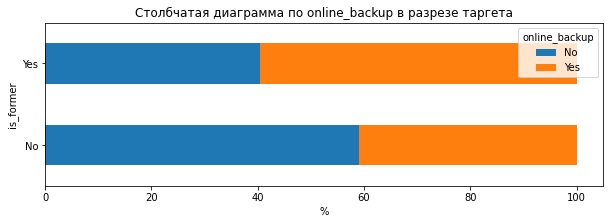

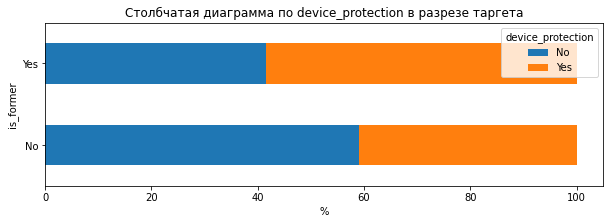

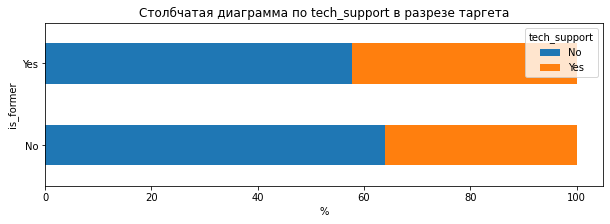

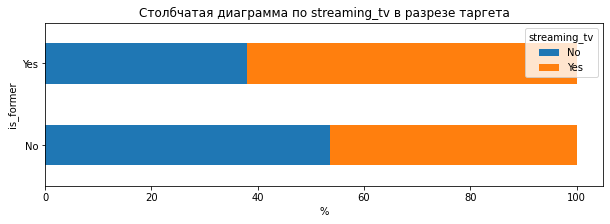

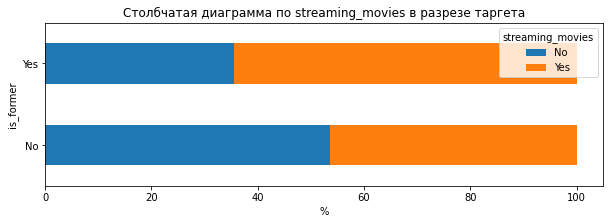

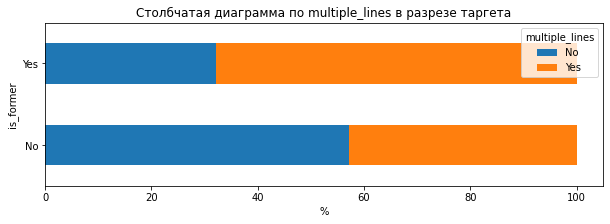

In [55]:
# построим столбчатую диаграмму
for col in cat_col_services:  # в цикле перебираем столбцы

    df_tab = df_all.loc[df_all[col] != 'No information'] # запоминаем датасет
    rows_tab = df_tab['is_former'].nunique() # количество строк для таблицы
    columns_tab = df_tab[col].nunique() # количество столбцов для таблицы
    
    # строим сводную таблицу
    table = pd.pivot_table(data=df_tab, 
                   index='is_former', 
                   values='total_charges', 
                   columns=col, 
                   aggfunc=len, 
                   margins=True)
    table = table.div(table.iloc[:,-1], axis=0).mul(100) # рассчитываем доли
    table = table.iloc[:rows_tab,:columns_tab] # удаляем ненужные ячейки

    # рисуем горизонтальную столбчатую диаграмму
    table.plot.barh(
        figsize=(10, 3),
        stacked=True,
        edgecolor='none')

    plt.xlabel('%') # подписываем ось X
    plt.title(f'Столбчатая диаграмма по {col} в разрезе таргета')  # подписываем каждый график названием соответствующего признака

plt.show()

**Выводы по анализу распределения категориальных признаков с информацией по услугам абонентов в разрезе групп клиентов**


1. **Тип подключения (internet_service)**: Среди текущих клиентов больше тех, кто использует оптоволоконное подключение (54.65 %), в то время как среди бывших клиентов больше тех, кто использует DSL (63.23 %).
 

2. **Блокировка опасных сайтов (online_security)**: Среди текущих клиентов больше тех, кто не использует онлайн-безопасность (64.95 %), в то время как среди бывших клиентов больше тех, кто использует онлайн-безопасность (44.10 %).
 

3. **Облачное хранилище файлов для резервного копирования данных (online_backup)**: Среди текущих клиентов больше тех, кто не использует онлайн-резервное копирование (59.16 %), в то время как среди бывших клиентов больше тех, кто использует онлайн-резервное копирование (59.51 %).
 

4. **Антивирус (device_protection)**: Среди текущих клиентов больше тех, кто не использует антивирус (59.09 %), в то время как среди бывших клиентов больше тех, кто использует антивирус (58.45 %).


5. **Выделенная линия технической поддержки (tech_support)**: Среди текущих клиентов больше тех, кто не использует выделенную линию технической поддержки (64.03 %), в то время как среди бывших клиентов больше тех, кто использует выделенную линию технической поддержки (42.29 %).


6. **Стриминговое телевидение (streaming_tv)**: Среди текущих клиентов больше тех, кто не использует стриминговое телевидение (53.61 %), в то время как среди бывших клиентов больше тех, кто использует стриминговое телевидение (62.06 %).


7. **Каталог фильмов (streaming_movies)**: Среди текущих клиентов больше тех, кто не использует стриминговые фильмы (53.54 %), в то время как среди бывших клиентов больше тех, кто использует стриминговые фильмы (64.39 %).


8. **Подключение телефона к нескольким линиям одновременно (multiple_lines)**: Среди текущих клиентов больше тех, кто не использует несколько линий (57.24 %), в то время как среди бывших клиентов больше тех, кто использует несколько линий (67.94 %).

Эти выводы могут помочь лучше понять различия между текущими и бывшими клиентами, что может быть полезно для разработки более точных моделей прогнозирования оттока клиентов.

#### Вывод по результатам исследования признаков датасета по бывшим и текущим клиентам

Сделаем выводы о результатах сравнительного анализа признаков абонентов компании по группам клиентов. 

**ПОРТРЕТЫ ТИПИЧНЫХ ТЕКУЩИХ И БЫВШИХ КЛИЕНТОВ**

**ТЕКУЩИЕ КЛИЕНТЫ**
- **Ежемесячные расходы**: Предпочитают экономить.
- **Общие расходы**: В среднем меньше тратят.
- **Продолжительность договора**: Включают как новых, так и постоянных клиентов. Имеют более низкую среднюю продолжительность договора.
- **Электронный расчётный лист**: Чаще используют электронный расчет.
- **Пол**: Гендерное распределение примерно равное.
- **Тип платежа**: Предпочитают банковские переводы.
- **Есть ли у абонента супруг или супруга**: Больше тех, кто не имеет партнера.
- **Есть ли у абонента дети**: Больше тех, у кого нет детей.
- **Является ли абонент пенсионером**: Больше тех, кто не является пенсионером.
- **Тип оплаты: раз в год-два или ежемесячно**: Чаще выбирают месячные тарифы.
- **Тип подключения** Чаще используют оптоволоконное подключение.
- **Интернет и телефонные услуги** Чаще не используют.


**БЫВШИЕ КЛИЕНТЫ**

- **Ежемесячные расходы**: Тратили больше и подключали больше сервисов.
- **Общие расходы**: Использовали более дорогие тарифы и большее количество услуг.
- **Продолжительность договора**: Имеют более высокую среднюю продолжительность договора.
- **Электронный расчётный лист**: Чаще выбирают традиционные методы.
- **Пол**: Среди бывших клиентов чуть больше мужчин.
- **Тип платежа**: Чаще используют кредитные карты.
- **Есть ли у абонента супруг или супруга**: Больше тех, кто имеет партнера.
- **Есть ли у абонента дети**: Больше тех, у кого есть дети .
- **Является ли абонент пенсионером**: Больше пенсионеров.
- **Тип оплаты: раз в год-два или ежемесячно**: Чаще выбирают двухлетние тарифы.
- **Тип подключения** Чаще используют оптоволоконное подключение.
- **Интернет и телефонные услуги** Чаще используют онлайн-безопасность и стриминговые сервисы.


Очевидно, что две группы клиентов имеют разное потребительское поведение и обладают различными характеристиками. 

Текущие клиенты склонны к использованию более экономных тарифов и услуг, имеют более короткую продолжительность договоров и чаще выбирают электронные методы оплаты и современные типы подключения, такие как оптоволоконное подключение. Они также чаще не используют дополнительные услуги, такие как онлайн-безопасность и стриминговые сервисы.

Бывшие клиенты, напротив, использовали более дорогие тарифы и услуги, имели более длительные контракты и чаще выбирали традиционные методы оплаты и подключения, такие как кредитные карты и DSL. Они также чаще использовали дополнительные услуги, такие как онлайн-безопасность и стриминговые сервисы.

После исследовательского анализа приступим к корреляционному анализу признаков. 

### Корреляционный анализ признаков

В этом подразделе мы проведём корреляционный анализ, чтобы оценить взаимосвязи между признаками.

В рамках этого подраздела мы выполняем следующие шаги:
1. Создаём корреляционную матрицу, используя коэффициенты корреляции $\phi_K$;
2. Проанализируем полученные данные;
3. Если будут подозрения на мультиколлинеарность, проверяем их при помощи VIF (Variance Inflation Factor).

#### Анализ матрицы корреляций

Проведем анализ парных коэффициентов корреляции phi.

In [56]:
# рассчитаем коэффициенты phi
# указываем количественные признаки отдельно
df_phik = df_all.phik_matrix(interval_cols=num_col)

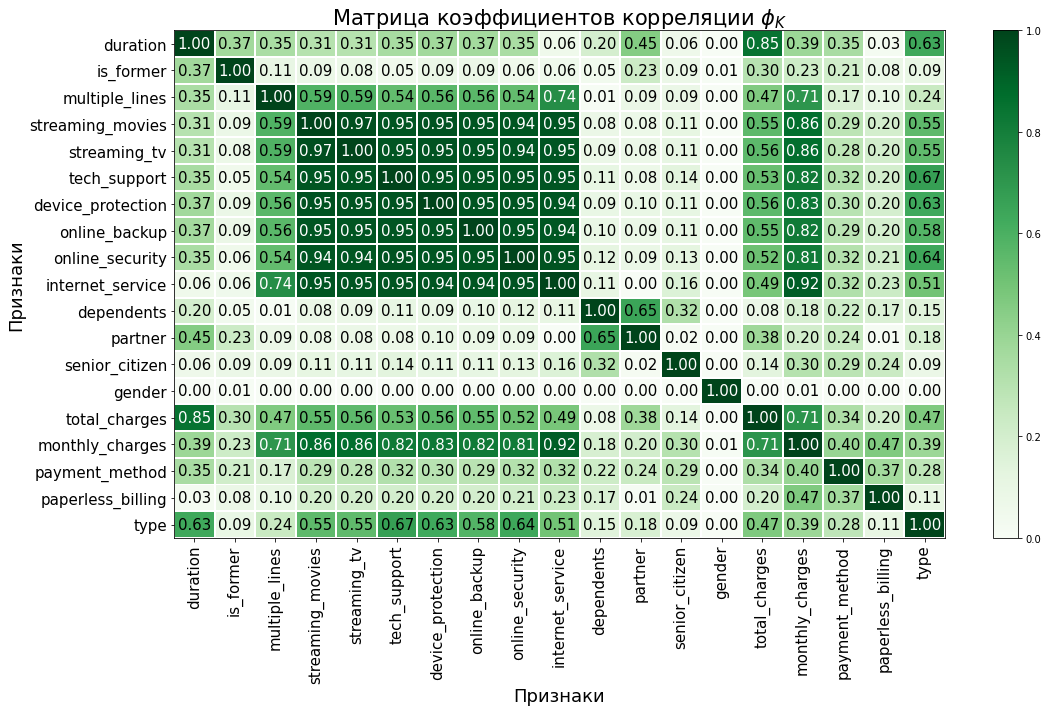

In [57]:
# построим матрицу корреляции
plot_correlation_matrix(
    df_phik.values, # двумерный массив значений
    x_labels=df_phik.columns, # названия столбцов матрицы
    y_labels=df_phik.index, # названия строк матрицы
    vmin=0, # минимальное значение коэффициента корреляции
    vmax=1, # максимальное значение коэффициента корреляции
    color_map='Greens', # цветовая схема для отображения коэффициентов корреляции
    title=r'Матрица коэффициентов корреляции $\phi_K$', # заголовок графика
    x_label='Признаки', # подпись оси X
    y_label='Признаки', # подпись оси Y
    fontsize_factor=1.5, # коэффициент увеличения размера шрифта
    figsize=(16, 10) # размер графика
)

Сразу обращает на себя внимание один важный момент.

Мы можем наблюдать тесную корреляцию между признаками, связанными с услугами провайдера. Получается, что в массовом проявлении нам неважно, какую именно услугу клиент подключает, так как связь между их использованием или неиспользованием функциональна для всех видов услуг.

Зная то, что не по всем клиентам имеется достоверная информация о типах услуг провайдера, исключим данные признаки из датасета.

Кроме того, видно, что половая принадлежность, наоборот, не играет никакой роли в изменчивости какого-либо другого признака. Значит, можно также исключить этот признак.

In [58]:
# составим список признаков для исключения
col_to_drop = cat_col_services.copy()

# добавим в него признак половой принадлежности
col_to_drop.append('gender')

In [59]:
# выведем на экран список признаков для удаления из датасета
col_to_drop

['internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines',
 'gender']

Далее преобразуем датасет и приведем к нужному нам порядку столбцы в нем. Проведем повторный расчет коэффициентов корреляции phi.

In [60]:
# преобразуем датасет для повторного анализа матрицы корреляции
df_drop = df_all.drop(col_to_drop, axis=1)

In [61]:
# составим список признаков для упорядоченного представления матрицы корреляции
col_arranged = df_drop.columns.to_list()
col_arranged.remove('is_former')
col_arranged.append('is_former')

In [62]:
# повторно считаем корреляции
df_phik_dropped = df_all[col_arranged].phik_matrix(interval_cols=num_col)

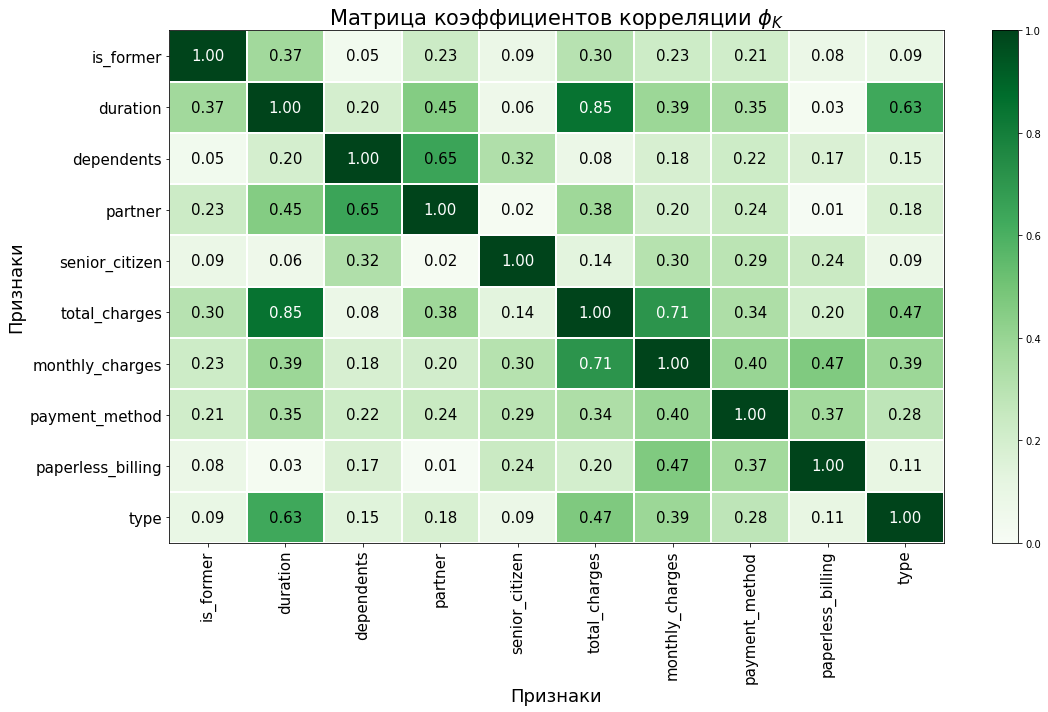

In [63]:
# построим матрицу корреляции
plot_correlation_matrix(
    df_phik_dropped.values, # двумерный массив значений
    x_labels=df_phik_dropped.columns, # названия столбцов матрицы
    y_labels=df_phik_dropped.index, # названия строк матрицы
    vmin=0, # минимальное значение коэффициента корреляции
    vmax=1, # максимальное значение коэффициента корреляции
    color_map='Greens', # цветовая схема для отображения коэффициентов корреляции
    title=r'Матрица коэффициентов корреляции $\phi_K$', # заголовок графика
    x_label='Признаки', # подпись оси X
    y_label='Признаки', # подпись оси Y
    fontsize_factor=1.5, # коэффициент увеличения размера шрифта
    figsize=(16, 10) # размер графика
)

**ВЫВОДЫ ПО ИТОГАМ АНАЛИЗА МАТРИЦЫ КОРРЕЛЯЦИИ**

1. **Высокая корреляция между продолжительностью (duration) и общими расходами (total_charges)**: Срок договора (duration) имеет высокую корреляцию с общими расходами (total_charges) (0.85). Теснота этой взамсвязи близка к функциональной. Это может означать, что клиенты, которые пользуются услугой дольше, имеют более высокие общие расходы.


2. **Высокая корреляция между ежемесячными расходами (monthly_charges) и общими расходами (total_charges)**: Коэффициент корреляции между этими признаками составляет 0.71. Это указывает на сильную взаимосвязь между ежемесячными и общими расходами. Клиенты, которые тратят больше ежемесячно, также имеют более высокие общие расходы.


3. **Высокая корреляция между наличием партнеров (partner) и наличием детей (dependents)**: Коэффициент корреляции между этими признаками составляет 0.65. Как правило, наличие партнеров и детей взаимосвязано.


4. **Высокая корреляция между типом оплаты (type) и продолжительностью договора (duration)**: Коэффициент корреляции между этими признаками составляет 0.63. Это указывает на то, что тип оплаты и продолжительность контракта сильно взаимосвязаны. Клиенты, использующие определенные типы оплаты, могут дольше оставаться абонентами провайдера.


5. **Сильнее всего на целевую переменную (is_former) влияют признаки:** продолжительность договора (duration) - 0.37, общие расходы абонента (total_charges) - 0.30, наличие партнеров (partner) и ежемесячные расходы (monthly_charges) - 0.23, а также тип платежа (payment_method) - 0.21.

Эти результаты показывают, что продолжительность использования услуги и общие расходы тесно взаимосвязаны со статусом клиента. Наличие партнеров, ежемесячные расходы и тип платежатакже играют важную роль, хотя и в меньшей степени.
Эти выводы могут помочь лучше понять, какие факторы наиболее сильно влияют на лояльность клиентов и их склонность оставаться пользователями услуги.


Дальше выполним анализ Variance Inflation Factor, поскольку имеем подозрения на мультиколлинеарность признаков.

#### Анализ Variance Inflation Factor

В ходе анализа матрицы корреляций мы заметили, что между определенными признаками прослеживается слишком сильная взаимосвязь (`duration` и `total_charges`).

Стоит провести анализ VIF, чтобы зафиксировать факт мультиколлинеарности признаков.

Поскольку часть признаков категориальные, осуществим необходимые преобразования и рассчитаем значения VIF как для количественных переменных, так и для категориальных.

In [64]:
# создаем датафрейм с набором данных для расчета VIF 
df_all_vif = df_all[col_arranged].assign(const=1) # cоздаём новый столбец const со значением 1

In [65]:
# для каждого столбца `col` в данных `df_all_vif`, который имеет тип данных 'object' (т. е. категориальный),
for col in df_all_vif.select_dtypes(include=['object']).columns:
    # создаём экземпляр OneHotEncoder с параметром sparse_output=False, чтобы преобразовать данные в разреженную матрицу,
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    # применяем метод fit_transform к данным `df_all_vif` для одного столбца `col`,
    dummy_encoded = encoder.fit_transform(df_all_vif[[col]])
    # и заменяем значение столбца `col` на преобразованные данные.
    df_all_vif[col] = dummy_encoded

In [66]:
# создадим таблицу с VIF-коэффициентами
# задаем датафрейм
vif_data = pd.DataFrame()

# сохраняем имена признаков из исходной таблицы в таблицу c VIF
vif_data["Признак"] = df_all_vif.columns

# рассчитываем VIF-значения для каждого признака
vif_data["VIF"] = [variance_inflation_factor(df_all_vif.values, i) for i in range(df_all_vif.shape[1])]
  
# выведем таблицу на экран
vif_data

,Признак,VIF
0,type,1.860466
1,paperless_billing,1.179760
2,payment_method,1.064291
3,monthly_charges,3.499871
4,total_charges,9.047301
5,senior_citizen,1.124753
6,partner,1.449639
7,dependents,1.374850
8,duration,6.390037
9,is_former,1.121149


Если VIF больше 5, то это может указывать на наличие мультиколлинеарности.

Ежемесячные расходы (`monthly_charges`), общие расходы (`total_charges`) и продолжительность договора (`duration`) имеют высокую взаимосвязь с другими признаками, что может указывать на необходимость корректировки моделей классификации в условиях мультиколлинеарности.
Остальные признаки не оказывают такого влияния на признаковое пространство.

Примем решение исключить из анализа признак общих расходов `total_charges` из-за его тесной взаимосвязи с продолжительностью договора. По сути, `total_charges` дублирует информацию о сроке, на который клиент заключил с компанией договор. 

In [67]:
# из списка с отобранными признаками удалим 'total_charges' 
col_arranged.remove('total_charges')

Осуществим повторно расчет VIF.

In [68]:
# создаем датафрейм с набором данных для расчета VIF 
df_all_vif = df_all[col_arranged].assign(const=1) # cоздаём новый столбец const со значением 1

In [69]:
# для каждого столбца `col` в данных `df_all_vif`, который имеет тип данных 'object' (т. е. категориальный),
for col in df_all_vif.select_dtypes(include=['object']).columns:
    # создаём экземпляр OneHotEncoder с параметром sparse_output=False, чтобы преобразовать данные в разреженную матрицу,
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    # применяем метод fit_transform к данным `df_all_vif` для одного столбца `col`,
    dummy_encoded = encoder.fit_transform(df_all_vif[[col]])
    # и заменяем значение столбца `col` на преобразованные данные.
    df_all_vif[col] = dummy_encoded

In [70]:
# создадим таблицу с VIF-коэффициентами
# задаем датафрейм
vif_data = pd.DataFrame()

# сохраняем имена признаков из исходной таблицы в таблицу c VIF
vif_data["Признак"] = df_all_vif.columns

# рассчитываем VIF-значения для каждого признака
vif_data["VIF"] = [variance_inflation_factor(df_all_vif.values, i) for i in range(df_all_vif.shape[1])]
  
# выведем таблицу на экран
vif_data

,Признак,VIF
0,type,1.855642
1,paperless_billing,1.178818
2,payment_method,1.063674
3,monthly_charges,1.339704
4,senior_citizen,1.123546
5,partner,1.449437
6,dependents,1.374673
7,duration,1.932335
8,is_former,1.108628
9,const,30.149708


**ВЫВОДЫ ПО ИТОГАМ АНАЛИЗА VIF**

Наши подозрения на счет мультиколлинеарности признаков подтвердил анализ VIF. У трех взаимосвязанных между собой признаков мы обнаружили высокие значения VIF.

В итоге, было принято решение удалить признак `total_charges` из выборки в связи с дублированием информации.

Это привело к стабильности коэффициентов VIF и отсутствию мультиколлинеарности между признаками.

#### Выводы по результатам корреляционного анализа данных

В этом подразделе мы провели корреляционный анализ признаков.

Мы выполнили следующие шаги:
1. Создали корреляционную матрицу, используя коэффициенты корреляции $\phi_K$;
2. Проанализировали коэффициенты и увидели, что столбцы с информацией об услугах интернета и телефонии функционально связаны между собой. В связи с этим было принято решение удалить их из выборки, в том числе в силу отсутствия части данных по некоторым клиентам (которые мы ранее импутировали). Кроме того, было выявлено, что половая принадлежность (признак `gender`) абсолютно не взаимосвязана с другими признаками. Его мы тоже удалили из датасета;
3. Подозрения на мультиколлинеарность (коэффициент корреляции между признаками `total_charges` и `duration` - 0.85) подтвердились в результате расчета VIF (Variance Inflation Factor). Было принято решение удалить признак `total_charges`, что сбалансировало признаковое пространство и исключило дублирование информации.

### Общий вывод по итогам исследовательского анализа данных

**Главные инсайты о портретах текущих и бывших клиентов компании "ТелеДом"**

*Текущие клиенты* чаще экономят, используют электронные методы оплаты, не имеют партнеров и детей, не являются пенсионерами, выбирают оптоволоконное подключение и месячные тарифы, избегая дополнительных услуг.

*Бывшие клиенты* тратили больше, выбирали дорогие тарифы и услуги, традиционные методы оплаты, имели более длительные договоры, чаще были пенсионерами и использовали дополнительные услуги.

**Признаки, играющие важную роль в различиях между клиентами:**

1. **Ежемесячные расходы**: Текущие клиенты склонны экономить, тогда как бывшие клиенты тратили больше. Эти данные помогут сегментировать клиентов по уровню их расходов и предсказывать их поведение. Тем не менее, из датасета был удален признак `total_charges` в связи с тесной взаимосвязью с продолжительностью договора.
2. **Продолжительность договора**: Текущие клиенты имеют более короткие контракты, в то время как бывшие клиенты дольше оставались с компанией. Важный признак для прогнозирования лояльности клиентов и оценки вероятности их ухода.
3. **Методы оплаты**: Текущие клиенты чаще используют электронные методы, тогда как бывшие клиенты предпочитают традиционные методы, такие как кредитные карты. Поможет настроить предложения по оплате, которые будут более привлекательны для различных групп клиентов.
4. **Семейное положение и наличие детей**: Текущие клиенты чаще одиноки и без детей, тогда как бывшие клиенты имеют партнеров и детей. Эти признаки могут помочь в настройке таргетированной рекламы и персонализации предложений.
5. **Социальный статус**: Текущие клиенты в основном не пенсионеры, в то время как среди бывших клиентов больше пенсионеров. Важно для разработки специальных предложений и услуг, учитывающих потребности различных возрастных групп. В связи с отсутствием взаимосвязи из датасета был удален признак половой принадлежности (`gender`). 
6. **Использование дополнительных услуг**: В связи с тесной взаимосвязью из датасета были удалены признаки с информацией об интернет-услугах и телефонии.

* Удаление признаков, таких как услуги интернета и телефонии, а также `gender`, уменьшает размерность данных, что может упростить модель и ускорить процесс обучения. 

* Удаление сильно коррелированных признаков, таких как `total_charges`, помогает снизить риск переобучения модели. Это улучшает обобщающую способность модели на новых данных.

* Упрощение модели за счет удаления незначимых признаков делает ее более интерпретируемой. Это позволяет лучше понять, какие характеристики действительно влияют на классификацию клиентов.

Эти выводы помогут компании "ТелеДом" лучше понимать своих клиентов и разрабатывать более эффективные маркетинговые стратегии и модели машинного обучения для улучшения обслуживания и удержания клиентов.

## Подготовка данных

На этапе подготовки данных к обучению мы:

- Сформируем итоговый датасет для классификации;
- Определим списки количественных и категориальных признаков;
- Разделим датасет на обучающую и тестовую выборки;
- Закодируем целевую переменную при помощи LabelEncoder();
- Создадим пайплайны для подготовки данных и обучения моделей;
- Напишем словари с диапазонами гиперпараметров для подбора через RandomizedSearchCV;
- Запишем функцию для обучения моделей разного класса.

Для обучения будем использовать модели разного класса:
- Логистическая регрессия;
- Случайный лес;
- Градиентный бустинг (LightGBM и CatBoost).

Приступим к реализации намеченных шагов.

### Формирование выборок

Сформируем выборки для обучения и тестирования моделей.

In [71]:
# сохраняем выборку с отобранными признаками
data = df_all[col_arranged]

In [72]:
# сохраняем признаки и целевую переменную в отдельные датафреймы
X = data.drop(['is_former'], axis=1)
y = data['is_former']

In [73]:
# формируем списки с количественными и категориальными признаками
num_columns = X.select_dtypes(include = 'number').columns.tolist()
cat_columns = X.select_dtypes(include = 'object').columns.tolist()

In [74]:
# разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

In [75]:
# выведем на экран размеры обучающей и тестовой выборок
print(f'Размер обучающей выборки {X_train.shape}')
print(f'Размер тестовой выборки {X_test.shape}')

Размер обучающей выборки (5282, 8)
Размер тестовой выборки (1761, 8)


Мы успешно справились с задачей.

### Кодирование целевого признака

Применим LabelEncoder для кодирования классов в целевой переменной.

In [76]:
# кодирование целевого признака
label_encoder = LabelEncoder()

# применяем label_encoder для обучающей и тестовой выборок таргета 
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# проверим как произошло кодирование целового признака
label_encoder.inverse_transform([0, 1])

array(['No', 'Yes'], dtype=object)

Далее приступим к подготовке пайплайнов.

### Создание пайплайнов для обработки данных и обучения моделей

В пайплайнах и функции обучения пропишем соответствующие итерации:

1. **Для логистической регрессии**:
    - Кодируем категориальные признаки при помощи OneHotEncoder,
    - Масштабируем количественные признаки при помощи StandardScaler.


2. **Для случайного леса**:
    - Кодируем категориальные признаки при помощи OrdinalEncoder.


3. **Для LightGBM**:
    - Приводим категориальные признаки к формату 'category'.


4. **Для CatBoost**:
    - Передаем список категориальных признаков в cat_features.

In [77]:
# создаем пайплайн для обработки категориальных признаков (OneHotEncoder)
ohe_pipe = Pipeline(
    [
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [78]:
# создаем пайплайн для обработки категориальных признаков (OrdinalEncoder)
ord_pipe = Pipeline(
    [
        (
            'ord',
            OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [79]:
# создаём общий пайплайн подготовки данных для LogisticRegression()
data_preprocessor_lr = ColumnTransformer(
    [
        ('num', StandardScaler(), num_columns),
        ('ohe', ohe_pipe, cat_columns)
    ], 
    remainder='passthrough'
)

# создаём общий пайплайн для подготовки данных для RandomForestClassifier()
data_preprocessor_rf = ColumnTransformer(
    [
        ('ord', ord_pipe, cat_columns)
    ], 
    remainder='passthrough'
)

In [80]:
# создаём итоговый пайплайн для LogisticRegression: подготовка данных и модель
pipe_final_lr = Pipeline([
                            ('preprocessor', data_preprocessor_lr),
                            ('model', LogisticRegression(random_state=RANDOM_STATE))
])

# создаём итоговый пайплайн для RandomForestClassifier: подготовка данных и модель
pipe_final_rf = Pipeline([
                            ('preprocessor', data_preprocessor_rf),
                            ('model', RandomForestClassifier(random_state=RANDOM_STATE,))
])

# создаём итоговый пайплайн LGBMClassifier: модель
pipe_final_lgbm = Pipeline([
                            ('model', LGBMClassifier(random_state=RANDOM_STATE))
])

# создаём итоговый пайплайн CatBoostClassifier: модель
pipe_final_cat = Pipeline([
                            ('model', CatBoostClassifier(random_state=RANDOM_STATE, 
                                                         cat_features=cat_columns,
                                                         logging_level='Silent'))
])

Напишем словари гиперпараметров для различных моделей машинного обучения.

1. **LogisticRegression()**

- **model__C**: Этот параметр определяет параметр регуляризации (inverse of regularization strength). Здесь он принимает значения 1, 0.1, 0.01 и 0.001.
- **model__solver**: Определяет алгоритм для оптимизации функции потерь. Возможные значения: 'newton-cholesky', 'liblinear' и 'saga'.

2. **RandomForestClassifier()**

- **model__max_depth**: Задает максимальную глубину дерева. Диапазон значений от 5 до 200 (включительно).
- **model__min_samples_leaf**: Определяет минимальное количество объектов в листьях. Диапазон значений от 2 до 50 (включительно).
- **model__n_estimators**: Количество деревьев в лесу. Возможные значения: 100, 150 и 200.

3. **LGBMClassifier()**

- **model__n_estimators**: Количество деревьев в лесу. Возможные значения: 50, 100 и 200.
- **model__num_leaves**: Определяет количество листьев в каждом дереве. Диапазон значений от 5 до 30 (включительно).
- **model__learning_rate**: Скорость обучения (learning rate). Возможные значения: 0.01, 0.05 и 0.1.

4. **CatBoostClassifier()**

- **model__n_estimators**: Количество деревьев в лесу. Возможные значения: 50, 100 и 200.
- **model__depth**: Максимальная глубина деревьев. Диапазон значений от 5 до 16 (включительно).
- **model__learning_rate**: Скорость обучения. Возможные значения: 0.01, 0.05 и 0.1.

Эти словари гиперпараметров используются для настройки моделей машинного обучения. Они позволяют проводить случайный поиск оптимальных значений гиперпараметров.

In [81]:
# cловарь для модели LogisticRegression()
param_distributions_lr = {
    'model__C': [1, 0.1, 0.01, 0.001], 
    'model__solver': ['newton-cholesky', 'liblinear', 'saga']
}

# словарь для модели RandomForestClassifier()
param_distributions_rf = {
    'model__max_depth': range(5, 200),
    'model__min_samples_leaf': range(2, 50),
    'model__n_estimators': [100, 150, 200]
}

# словарь для модели LGBMClassifier()
param_distributions_lgbm = {
    'model__n_estimators': [50, 100, 200],
    'model__num_leaves': range(5, 30),
    'model__learning_rate': [0.01, 0.05, 0.1]
}

# словарь для модели CatBoostClassifier()
param_distributions_cat = {
     'model__n_estimators': [50, 100, 200],
     'model__depth': range(5, 16),
     'model__learning_rate': [0.01, 0.05, 0.1]
}

Напишем функцию model_pred, которая занимается обучением моделей и поиском наилучших гиперпараметров.

1. Создается объект RandomizedSearchCV, который используется для поиска наилучших гиперпараметров модели.

    В качестве аргументов передаются:
    - pipe_final: предварительно подготовленный пайплайн модели.
    - param_distributions: словарь с распределениями гиперпараметров для поиска.
    - cv=5: количество сгибов в кросс-валидации.
    - scoring='roc_auc': метрика для оценки модели.
    - random_state=RANDOM_STATE: случайное состояние для воспроизводимости результатов.
    - n_jobs=-1: количество параллельных заданий для выполнения.
    - verbose=3: уровень детализации логов.


2. Проверка типа модели. 
    - Используется isinstance для проверки, является ли модель экземпляром класса LGBMClassifier.
    
    Если модель является экземпляром LGBMClassifier, то: 
        * Создается копия тренировочного набора данных X_train. Категориальные столбцы преобразуются в тип category с помощью метода astype('category').
        * Затем выполняется подбор наилучшей модели с помощью randomized_search.fit(X_train_lgbm, y_train).
        
    Если модель не является экземпляром LGBMClassifier, подбор модели выполняется с помощью randomized_search.fit(X_train, y_train) без дополнительных преобразований.
    

3. Возвращение результатов.

    Функция возвращает следующие значения:
    - best_estimator: лучшая модель с настроенными гиперпараметрами.
    - best_params: лучшие найденные гиперпараметры.
    - best_score: значение метрики ROC-AUC для лучшей модели.

Эта функция автоматизирует процесс подбора гиперпараметров для различных моделей, учитывая особенности преобразования данных для LGBMClassifier.

In [82]:
# запишем функцию для обучения моделей
def model_pred(pipe_final, param_distributions):
    
    # активируем поиск лучшей модели 
    randomized_search = RandomizedSearchCV(pipe_final, 
                                           param_distributions, 
                                           cv=5,
                                           scoring='roc_auc',
                                           random_state=RANDOM_STATE,
                                           n_jobs=-1,
                                           verbose=3)
    
    # проверяем, является ли объект экземпляром указанного класса 
    if isinstance(pipe_final['model'], LGBMClassifier):
        # преобразуем тип категориальных признаков для LGBM
        X_train_lgbm = X_train
        X_train_lgbm[cat_columns] = X_train_lgbm[cat_columns].astype('category')
        randomized_search.fit(X_train_lgbm, y_train)    # подбираем лучшую модель для LGBM
    else:   
        randomized_search.fit(X_train, y_train)    # подбираем лучшую модель
    
    # функция вернет лучшую модель, её параметры, значение метрики на кросс-валидационной выборке
    return  randomized_search.best_estimator_, \
            randomized_search.best_params_, \
            randomized_search.best_score_

Пайплайны и функция написаны.

### Общий вывод по подготовке данных

На этапе подготовки данных нам удалось:

- Сформировать обучающую и тестовую выборки;
- Закодировать целевую переменную при помощи LabelEncoder();
- Определить процедуры обработки количественных и категориальных признаков для каждого класса моделей (логистической регрессии, случайного леса и градиентных бустингов);
- Написать соответствующие пайплайны для подготовки данных и функцию для обучения моделей и случайного поиска гиперпараметров с кросс-валидацией.

Перейдем к обучению моделей.

## Обучение, тестирование и анализ моделей

Обучим модели и проанализируем результаты.

### Обучение моделей

In [83]:
# сохраняем результаты работы функции для линейной модели
best_estimator_lr, best_params_lr, best_score_lr = model_pred(pipe_final_lr, param_distributions_lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END model__C=0.01, model__solver=newton-cholesky;, score=0.688 total time=   0.2s
[CV 2/5] END model__C=0.01, model__solver=newton-cholesky;, score=0.709 total time=   0.5s
[CV 3/5] END model__C=0.01, model__solver=newton-cholesky;, score=0.706 total time=   0.4s
[CV 4/5] END model__C=0.01, model__solver=newton-cholesky;, score=0.671 total time=   0.2s
[CV 5/5] END model__C=0.01, model__solver=newton-cholesky;, score=0.725 total time=   0.4s
[CV 1/5] END model__C=0.1, model__solver=liblinear;, score=0.716 total time=   0.2s
[CV 2/5] END model__C=0.1, model__solver=liblinear;, score=0.719 total time=   0.2s
[CV 3/5] END model__C=0.1, model__solver=liblinear;, score=0.708 total time=   0.2s
[CV 4/5] END model__C=0.1, model__solver=liblinear;, score=0.693 total time=   0.2s
[CV 5/5] END model__C=0.1, model__solver=liblinear;, score=0.732 total time=   0.2s
[CV 1/5] END model__C=1, model__solver=liblinear;, score=0.719 t

In [84]:
# сохраняем результаты работы функции для случайного леса
best_estimator_rf, best_params_rf, best_score_rf = model_pred(pipe_final_rf, param_distributions_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END model__max_depth=39, model__min_samples_leaf=25, model__n_estimators=200;, score=0.809 total time=   0.7s
[CV 2/5] END model__max_depth=39, model__min_samples_leaf=25, model__n_estimators=200;, score=0.825 total time=   0.6s
[CV 3/5] END model__max_depth=39, model__min_samples_leaf=25, model__n_estimators=200;, score=0.802 total time=   0.6s
[CV 4/5] END model__max_depth=39, model__min_samples_leaf=25, model__n_estimators=200;, score=0.806 total time=   0.6s
[CV 5/5] END model__max_depth=39, model__min_samples_leaf=25, model__n_estimators=200;, score=0.808 total time=   0.7s
[CV 1/5] END model__max_depth=133, model__min_samples_leaf=39, model__n_estimators=150;, score=0.808 total time=   0.4s
[CV 2/5] END model__max_depth=133, model__min_samples_leaf=39, model__n_estimators=150;, score=0.824 total time=   0.4s
[CV 3/5] END model__max_depth=133, model__min_samples_leaf=39, model__n_estimators=150;, score=0.800 tot

In [85]:
# сохраняем результаты работы функции для light_gbm
best_estimator_lgbm, best_params_lgbm, best_score_lgbm = model_pred(pipe_final_lgbm, param_distributions_lgbm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END model__learning_rate=0.01, model__n_estimators=200, model__num_leaves=19;, score=0.810 total time= 2.8min
[CV 2/5] END model__learning_rate=0.01, model__n_estimators=200, model__num_leaves=19;, score=0.831 total time= 3.5min
[CV 3/5] END model__learning_rate=0.01, model__n_estimators=200, model__num_leaves=19;, score=0.811 total time=  59.4s
[CV 4/5] END model__learning_rate=0.01, model__n_estimators=200, model__num_leaves=19;, score=0.812 total time= 1.8min
[CV 5/5] END model__learning_rate=0.01, model__n_estimators=200, model__num_leaves=19;, score=0.814 total time= 1.7min
[CV 1/5] END model__learning_rate=0.01, model__n_estimators=100, model__num_leaves=28;, score=0.793 total time= 1.5min
[CV 2/5] END model__learning_rate=0.01, model__n_estimators=100, model__num_leaves=28;, score=0.826 total time=  48.8s
[CV 3/5] END model__learning_rate=0.01, model__n_estimators=100, model__num_leaves=28;, score=0.799 total 

In [86]:
# сохраняем результаты работы функции для CatBoost
best_estimator_cat, best_params_cat, best_score_cat = model_pred(pipe_final_cat, param_distributions_cat)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END model__depth=10, model__learning_rate=0.01, model__n_estimators=100;, score=0.759 total time=   1.4s
[CV 2/5] END model__depth=10, model__learning_rate=0.01, model__n_estimators=100;, score=0.764 total time=   1.0s
[CV 3/5] END model__depth=10, model__learning_rate=0.01, model__n_estimators=100;, score=0.759 total time=   1.3s
[CV 4/5] END model__depth=10, model__learning_rate=0.01, model__n_estimators=100;, score=0.758 total time=   1.2s
[CV 5/5] END model__depth=10, model__learning_rate=0.01, model__n_estimators=100;, score=0.762 total time=   1.2s
[CV 1/5] END model__depth=14, model__learning_rate=0.05, model__n_estimators=50;, score=0.789 total time=   4.1s
[CV 2/5] END model__depth=14, model__learning_rate=0.05, model__n_estimators=50;, score=0.807 total time=   3.4s
[CV 3/5] END model__depth=14, model__learning_rate=0.05, model__n_estimators=50;, score=0.773 total time=   3.5s
[CV 4/5] END model__depth=14, 

Мы обучили модели и получили результаты по ним.

На следующем шаге проанализируем результаты и выберем лучшую модель.

### Выбор лучшей модели

Главное для нашей задачи - метрика ROC-AUC. Выбирать лучшую модель будем исключительно по ней.

По таблице с результатами обучения моделей проведем сравнительный анализ и выберем лучшую.

In [87]:
# составим датафрейм с метриками моделей
model_results = pd.DataFrame({'train_roc_auc' : [best_score_lr,
                                                 best_score_rf,
                                                 best_score_lgbm,
                                                 best_score_cat]
                             },
                            index=['Линейная регрессия', 
                                   'Случайный лес',
                                   'LightGBM',
                                   'CatBoost']
                            )

In [88]:
# выведем таблицу с метрикой на кросс-валидационной выборке
model_results.round(3)

,train_roc_auc
Линейная регрессия,0.716
Случайный лес,0.812
LightGBM,0.888
CatBoost,0.828


Результаты обучения моделей на основе метрики ROC-AUC на кросс-валидационной выборке:

1. **Линейная регрессия (LogisticRegression)**: модель линейной регрессии имеет относительно низкое качество.

2. **Случайный лес (RandomForestClassifier)**: Модель случайного леса показывает лучшую производительность по сравнению с линейной регрессией. Она может лучше справляться с нелинейными зависимостями в данных благодаря использованию ансамблей деревьев решений.

3. **LightGBM (LGBMClassifier)**: Модель LightGBM демонстрирует значительно лучшую производительность с метрикой ROC-AUC 0.888. Это указывает на то, что LightGBM эффективно использует градиентный бустинг и может лучше адаптироваться к зависимостям в данных.

4. **CatBoost (CatBoostClassifier)**: Модель CatBoost показывает результат 0.828, что также является хорошим показателем, но немного уступает LightGBM.


**Выводы по результатам обучения**:

- **LightGBM** показывает наилучшую производительность с метрикой ROC-AUC 0.888, что свидетельствует о её высокой эффективности на данном наборе данных.
- **CatBoost** занимает промежуточное положение с метрикой 0.828, что также является хорошим показателем, но немного ниже LightGBM.
- **Случайный лес** показывает примлемый результат с метрикой 0.812, что подтверждает его способность работать с нелинейными данными.
- **Линейная регрессия** показывает наихудший результат с метрикой 0.716, что указывает на её ограниченную применимость для данного типа задач.

Для нашей задачи наиболее подходящей является модель класса ***LightGBM***. 

Проведем анализ лучшей модели на следующем шаге.

### Анализ лучшей модели

Проанализируем лучшую модель класса LGBM.

Рассмотрим параметры лучшей модели.

In [89]:
# лучшая модель класса LightGBM
best_estimator_lgbm  

Pipeline(steps=[('model',
                 LGBMClassifier(n_estimators=200, num_leaves=15,
                                random_state=251124))])

In [90]:
# найденные при помощи случайного поиска гиперпараметры лучшей модели класса LightGBM
best_params_lgbm

{'model__num_leaves': 15,
 'model__n_estimators': 200,
 'model__learning_rate': 0.1}

**Вывод по параметрам лучшей модели**

Параметры указывают на хорошо настроенную модель LightGBMClassifier, которая стремится к балансу между точностью и предотвращением переобучения. Основные выводы:

- Количество листовых узлов (num_leaves = 15): Ограниченное количество листьев помогает предотвратить переобучение.
- Количество деревьев (n_estimators = 200): Большое количество деревьев обеспечивает высокую точность и стабильность модели.
- Скорость обучения (learning_rate = 0.1): Низкая скорость обучения способствует более стабильному обучению модели.

Перейдем к прогнозу на тестовых данных по лучшей модели.

### Построение прогноза по лучшей модели

Проверим работу модели на тестовой выборке.

In [91]:
# сохраним обученную модель в отдельную переменную
lgb = best_estimator_lgbm['model']

In [92]:
# подготовим тестовые данные для LGBM
X_test_lgbm = X_test

# преобразуем тип категориальных признаков для LGBM
X_test_lgbm[cat_columns] = X_test_lgbm[cat_columns].astype('category')

In [109]:
# рассчитаем прогноз на тестовых данных
y_pred = lgb.predict(X_test_lgbm)
y_pred_proba = lgb.predict_proba(X_test_lgbm)[:, 1]

In [94]:
# расситаем метрику качества лучшей модели на тестовой выборке 
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_test, 3)}')

Метрика ROC-AUC на тестовой выборке: 0.929


Построим ROC кривую и посчитаем площадь под ней.

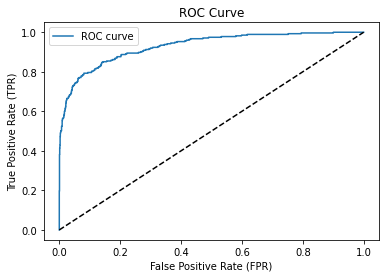

Площадь под ROC-кривой (AUC): 0.929


In [99]:
# рассчитаем TPR и FPR для различных порогов
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# построим график ROC-кривой
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--') # диагональная линия для сравнения
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

# рассчитаем площадь под кривой (AUC)
roc_auc_area = auc(fpr, tpr)
print(f'Площадь под ROC-кривой (AUC): {round(roc_auc_area, 3)}')

**Вывод по итогам тестирования лучшей модели**

Мы рассчитали вероятности классов.
Затем посчитали метрику ROC-AUC двумя методами:
- Напрямую при помощи roc_auc_score;
- Как площадь под кривой ROC.


**ИТОГ**: Качество лучшей модели на тестовой выборке удовлетворяет требованиям задачи (0.85 < 0.929).

### Исследование важности признаков лучшей модели

Проведем исследование важности признаков лучшей модели.

In [100]:
# составим датафрейм с величинами feature_importances по признакам
boost = lgb.booster_
lgb_feature_importances = pd.DataFrame({'Важность признаков': lgb.feature_importances_},
                                        index=boost.feature_name())

In [101]:
# выведем на экран таблицу с feature_importances
lgb_feature_importances.sort_values(by='Важность признаков', ascending=False)

,Важность признаков
duration,1701
monthly_charges,676
type,145
partner,73
dependents,66
paperless_billing,65
payment_method,41
senior_citizen,33


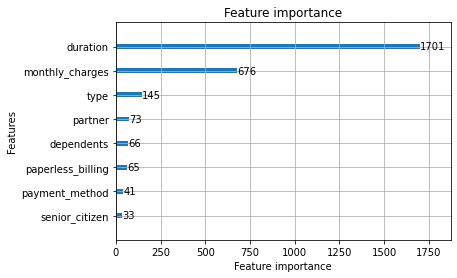

In [102]:
# построим график для важности признаков
lgbm.plot_importance(lgb)
plt.show()

Важность признаков представлена в виде значений, где большее значение указывает на более высокую важность признака.

1. Признак `duration` имеет наивысшую важность среди всех признаков. Это означает, что продолжительность договора имеет значительное влияние на предсказание ухода клиента.

2. Признак `monthly_charges` также имеет высокую важность, хотя и немного ниже `duration`. Ежемесячные расходы абонента также являются определяющим фактором в предсказаниях модели.

3. Признак `type` имеет умеренную важность. Пеориодичность оплаты влияет на предсказания, но в меньшей степени по сравнению с первыми двумя признаками.

4. Остальные признаки, включая `partner`, `dependents`, `paperless_billing`, `payment_method`, `senior_citizen` имеют относительно низкую важность и незначительно по сравнению с вышеупомянутыми признаками влияют на предсказания.

**Вывод по исследованию важности признаков лучшей модели**

Наиболее важными признаками для предсказаний модели являются количественные признаки - продолжительность договора в днях (`duration`) и расходы за месяц (`monthly_charges`), за которыми следуют категориальный признак тип оплаты (`type`). Остальные признаки имеют относительно низкую важность и могут оказывать минимальное влияние на предсказания модели.

### Матрица ошибок и отчет по классификации лучшей модели

Построим матрицу ошибок для лучшей модели. Эта матрица показывает, насколько хорошо наша модель предсказывает принадлежность клиентов к классам "Текущие" и "Бывшие".

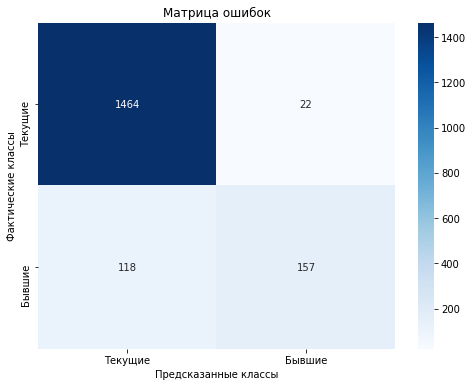

In [118]:
# матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# преобразование матрицы в формат для seaborn
labels = ['Текущие', 'Бывшие']
data_cm = [
    [conf_matrix[0][0], conf_matrix[0][1]],
    [conf_matrix[1][0], conf_matrix[1][1]]
]

# визуализация тепловой карты
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Предсказанные классы')
plt.ylabel('Фактические классы')
plt.title('Матрица ошибок')
plt.show()

**Выводы по анализу матрицы ошибок**

- **True Positives, TP:**
  - Текущие клиенты, которые были правильно предсказаны как текущие (1464).
- **False Positives, FP:**
  - Бывшие клиенты, которые были ошибочно предсказаны как текущие (22).
- **False Negatives, FN:**
  - Текущие клиенты, которые были ошибочно предсказаны как бывшие (118).
- **True Negatives, TN:**
  - Бывшие клиенты, которые были правильно предсказаны как бывшие (157).

Большинство текущих клиентов (1464) были правильно идентифицированы. Совсем небольшое количество бывших клиентов (22) было ошибочно идентифицировано как текущие.

Модель недостаточно точно диагностирует бывших клиентов. Число бывших клиентов (157), которые были правильно идентифицированы почти такое же, как и число фактически текущих клиентов (118), которые были ошибочно идентифицированы как бывшие.

In [120]:
# выведем на экран отчет по классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.95      1486
           1       0.88      0.57      0.69       275

    accuracy                           0.92      1761
   macro avg       0.90      0.78      0.82      1761
weighted avg       0.92      0.92      0.91      1761



**Выводы по анализу отчета по классификации**

Общая точность модели (accuracy) составляет 0.92, что является хорошим показателем. Это означает, что в целом модель хорошо справляется с классификацией.

Модель показывает высокую точность (0.93) и полноту (0.99) для класса "Текущие клиенты". Это означает, что она хорошо идентифицирует текущих клиентов и редко ошибается в их классификации.

Полнота для класса "Бывшие клиенты" составляет всего 0.57, что означает, что модель пропускает значительное количество бывших клиентов. Отсюда F1-score для класса "Бывшие клиенты" составляет всего 0.69, что указывает на необходимость улучшения модели в идентификации бывших клиентов.

### Общий вывод по результатам обучения и тестирования моделей

Мы обучили четыре модели для бинарной классификации (логистическая регрессия, случайный лес, LightGBM и CatBoost) и подобрали для них гиперпараметры при помощи случайного поиска с кросс-валидацией.

Лучшей моделью на кросс-валидационной выборке оказалась модель класса LightGBM. Её гиперпараметры: 
- num_leaves = 15
- n_estimators = 200
- learning_rate = 0.1

На тестовой выборке эта модель показала высокое качество. Метрика ROC-AUC составила 0.929, что выше необходимого порога (0.85), что говорит об успешном выполнении задачи.

В ходе исследования важности признаков лучшей модели мы установили, какие признаки сильнее всего влияют на классификацию целевой переменной. Это:
- продолжительность договора в днях (`duration`),
- расходы за месяц (`monthly_charges`),
- тип оплаты (`type`). 

Все прочие признаки имеют низкую важность и оказывают меньшее влияние на предсказания модели.

В результате анализа матрицы ошибок и отчета по классификации лучшей модели мы установили, что модель показывает хорошие результаты в классификации текущих клиентов, но нуждается в улучшении в идентификации бывших клиентов.

## Общий вывод по итогам проекта

Проект по созданию модели для прогнозирования оттока клиентов компании «ТелеДом» был успешно выполнен, и мы достигли всех поставленных целей и задач, выполнив все запланированные шаги.

- - -

**Основные этапы работы и полученные результаты**

1. **Загрузка и первичный осмотр данных**:
   - Были загружены и объединены данные из различных источников: `contract_new.csv`, `personal_new.csv`, `internet_new.csv`, `phone_new.csv`.
   - Проведен первичный осмотр данных.
    
    
2. **Предобработка данных**:
   - Проведен разведывательный анализ датасетов перед их объединением.
   - Объединены датасеты с использованием столбца `customer_id`.
   - Выполнены преобразования данных: изменены форматы столбцов, удалены календарные признаки и заполнены пропущенные значения.
   - Созданы новые признаки, такие как `is_former` (группировка клиентов - бывшие и текущие) и `duration` (продолжительность договора, в днях).
   
   
3. **Исследовательский анализ данных**:
   - Проведен всесторонний анализ данных, включая визуализацию и корреляционный анализ.
   - Получены инсайты о портретах текущих и бывших клиентов, выявлены ключевые различия между ними. Предварительно определены признаки, влияющие на классификацию клиентов.


4. **Подготовка данных для обучения модели**:
   - Данные разделены на обучающую и тестовую выборки.
   - Определены процедуры предобработки признаков для обучения моделей:
       * для логистической регрессии - OneHotEncoding кодирование и масштабирование количественных признаков, 
       * для случайного леса - OrdinalEncoding кодирование,
       * для моделей градиентного бустинга - автоматическая обработка категориальных признаков.
   - Написаны словари для подбора гиперпараметров.
   - Выполнена кодировка целевой переменной с использованием `LabelEncoder`.


5. **Обучение моделей**:
   - Обучены четыре модели (логистическая регрессия, случайный лес, LightGBM, CatBoost).
   - Проведен случайный поиск гиперпараметров с кросс-валидацией.
   - Лучшая модель на кросс-валидационной выборке — LightGBM с гиперпараметрами: `num_leaves = 15`, `n_estimators = 200`, `learning_rate = 0.1`.
   - На тестовой выборке модель показала высокое качество с метрикой ROC-AUC 0.929.
   
   
6. **Анализ важности признаков**:
   - Определены признаки, сильно влияющие на классификацию: продолжительность договора (`duration`), расходы за месяц (`monthly_charges`), тип оплаты (`type`).
   - Прочие признаки имеют низкую важность и оказывают меньшее влияние на предсказания модели.


7. **Анализ ошибок и отчета классификации**:
   - Модель показывает хорошие результаты в классификации текущих клиентов, но нуждается в улучшении в идентификации бывших клиентов.
   
- - -
   
**Итоговая модель и ее гиперпараметры**

- *Модель*: LightGBMClassifier
- *Гиперпараметры*:
  - `num_leaves = 15`
  - `n_estimators = 200`
  - `learning_rate = 0.1`
- *Качество модели на тестовой выборке*: ROC-AUC 0.929
   
- - -

**Список признаков для лучшей модели и их предобработка**

| Название признака | Сведения об абоненте | Формат | Предобработка и подготовка к обучению | Важность для классификации клиента|
|:--------|:--------|:--------|:--------|:--------|
| type | Тип оплаты: раз в год-два или ежемесячно | object | В соответствии с классом модели | Средняя |
| paperless_billing | Электронный расчётный лист |object| В соответствии с классом модели | Низкая |
| payment_method | Тип платежа | object | В соответствии с классом модели | Низкая |
| monthly_charges | Расходы за месяц | float64 | В соответствии с классом модели | Высокая |
|senior_citizen|Является ли абонент пенсионером|<font color="red">int64</font> → <font color="green">object</font>| Приведение к единому формату с остальными подобными столбцами. В соответствии с классом модели | Низкая |
|partner|Есть ли у абонента супруг или супруга|object| В соответствии с классом модели | Низкая |
|dependents|Есть ли у абонента дети|object| В соответствии с классом модели | Низкая |
|duration|Продолжительность действия договора в днях| int64 | Формирование на основе begin_date и end_date. Предобработка в соответствии с классом модели | Высокая |
|is_former|Группировка клиентов (бывший-текущий)| <font color="red">object</font> → <font color="green">int64</font>| Формирование на основе begin_date и end_date. LabelEncoder | ЦЕЛЕВОЙ ПРИЗНАК |

- - -
   
   
**Трудности и их преодоление**


1. **Переформатирование данных, поиск пропущенных значений и импутация данных**
   - Переформатирование 
   - Наличие пробелов (" ") в `total_charges` после проведения процедуры изменения формата (<font color="red">object</font> → <font color="green">float64</font>) вызвало появление пропусков. Пропуски заполнены "0". 
   - Наличие артефактов (значение "No") в `end_date` после проведения процедуры изменения формата (<font color="red">object</font> → <font color="green">datetime64</font>) также вызвало появление пропусков. Пропуски не заполнялись в связи с удалением признака из датасета после формирования новых переменных.
   - Несовпадение числа валидных значений в датасетах после объединения привело к появлению пропущенное значений в признаках из таблиц `internet_new` и `phone_new`. В связи с невыясненной природой несовпадения количества записей в таблицах, пропуски заполнены заглушкой "No information".
   
   
2. **Удаление слабо или сильно коррелированных признаков на основе матрицы корреляций phik и оценок VIF**:
   - Признаки, такие как `total_charges`, а также признаки дополнительных услуг провайдера из датасетов `internet_new` и `phone_new`, были удалены для снижения риска переобучения модели и улучшения ее обобщающей способности на новых данных.
   - Удаление незначимых признаков (`gender`) сделало модель более интерпретируемой и помогло лучше понять, какие характеристики действительно влияют на классификацию клиентов.

   
- - -

**Формирование рекомендаций для бизнеса**:

1. **Сегментация клиентов**:
   - Использовать ежемесячные расходы для сегментации клиентов по уровню их трат и прогнозирования их поведения.


2. **Управление продолжительностью договоров**:
   - Анализировать продолжительность договоров для прогнозирования лояльности клиентов и оценки вероятности их ухода.


3. **Оптимизация методов оплаты**:
   - Настроить предложения по оплате, учитывая предпочтения текущих и бывших клиентов (электронные методы для текущих, традиционные методы для бывших).


4. **Таргетированная реклама**:
   - Учитывать семейное положение и наличие детей при настройке таргетированной рекламы и персонализации предложений.


5. **Специальные предложения для пенсионеров**:
   - Разрабатывать специальные предложения и услуги, учитывающие потребности пенсионеров, так как они составляют значительную долю бывших клиентов.
   
  

Результаты проекта позволят компании «ТелеДом» глубже понять своих текущих и бывших клиентов, выявить ключевые признаки, влияющие на их поведение, и разработать рекомендации для улучшения обслуживания и удержания клиентов. Модель LightGBM показала высокое качество классификации, однако есть потенциал для улучшения идентификации бывших клиентов.

На основе полученных результатов компания может своевременно принимать меры по удержанию абонентов и повышению их удовлетворенности услугами, что обеспечит стабильный рост и развитие бизнеса.